In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Librerías importadas correctamente")
print("Configuración de visualizaciones establecida")


Librerías importadas correctamente
Configuración de visualizaciones establecida


In [67]:
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]

df = pd.read_csv('../../../datos/adult.data', names=column_names, na_values=' ?')

categorical_missing = ['workclass', 'occupation', 'native_country']
for col in categorical_missing:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

df_clean = df.copy()

df_clean['income_binary'] = (df_clean['income'] == ' >50K').astype(int)

print(f"Dataset cargado: {df_clean.shape[0]} filas, {df_clean.shape[1]} columnas")
print(f"Valores faltantes: {df_clean.isnull().sum().sum()}")
print(f"Variables clave disponibles: {['sex', 'race', 'occupation', 'income', 'fnlwgt']}")
print("\nPrimeras 5 filas del dataset limpio:")
df_clean[['sex', 'race', 'occupation', 'income', 'income_binary', 'fnlwgt']].head()


Dataset cargado: 32561 filas, 16 columnas
Valores faltantes: 0
Variables clave disponibles: ['sex', 'race', 'occupation', 'income', 'fnlwgt']

Primeras 5 filas del dataset limpio:


sex    race          occupation  income  income_binary  fnlwgt
0     Male   White        Adm-clerical   <=50K              0   77516
1     Male   White     Exec-managerial   <=50K              0   83311
2     Male   White   Handlers-cleaners   <=50K              0  215646
3     Male   Black   Handlers-cleaners   <=50K              0  234721
4   Female   Black      Prof-specialty   <=50K              0  338409

FUNCIONES AUXILIARES PARA ANÁLISIS DE PATRONES DEMOGRÁFICOS

In [68]:
def create_contingency_table(df, var1, var2, weight_var='fnlwgt', weighted=True):
    if weighted:
        contingency = df.groupby([var1, var2])[weight_var].sum().unstack(fill_value=0)
    else:
        contingency = pd.crosstab(df[var1], df[var2])
    
    return contingency

def create_contingency_table_3way(df, var1, var2, var3, weight_var='fnlwgt', weighted=True):
    if weighted:
        contingency = df.groupby([var1, var2, var3])[weight_var].sum()
    else:
        contingency = df.groupby([var1, var2, var3]).size()
    
    return contingency

def calculate_percentages(contingency_table, axis=1):
    return contingency_table.div(contingency_table.sum(axis=axis), axis=1-axis) * 100

def plot_contingency_heatmap(contingency_table, title, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    sns.heatmap(contingency_table, annot=True, fmt='.1f', cmap='Blues', cbar_kws={'label': 'Frecuencia'})
    plt.title(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


ANÁLISIS DE PATRONES DEMOGRÁFICOS: TABLAS DE CONTINGENCIA

1. Relaciones Bivariadas


TABLA DE CONTINGENCIA: SEXO × INGRESOS

Tabla de contingencia NO PONDERADA (conteos absolutos):
income  <=50K  >50K
sex                
Female   9592  1179
Male    15128  6662

Tabla de contingencia PONDERADA (usando fnlwgt):
income       <=50K        >50K
sex                           
Female  1784106066   216567452
Male    2921120121  1257579753

Porcentajes por filas (distribución de ingresos por género):
income  <=50K   >50K
sex                 
Female  89.18  10.82
Male    69.90  30.10


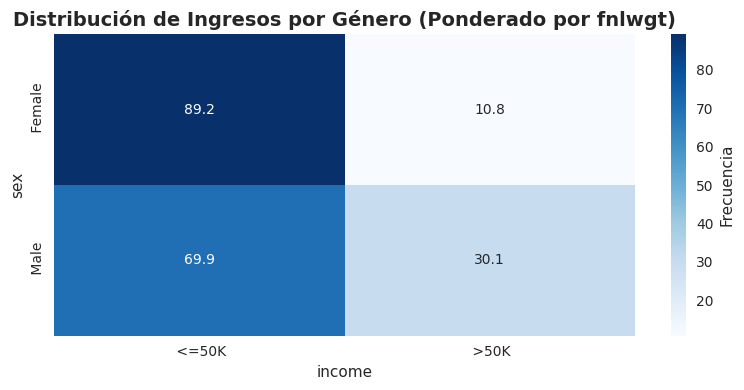

In [69]:
print("TABLA DE CONTINGENCIA: SEXO × INGRESOS")
print("="*50)

sex_income_unweighted = create_contingency_table(df_clean, 'sex', 'income', weighted=False)
print("\nTabla de contingencia NO PONDERADA (conteos absolutos):")
print(sex_income_unweighted)

sex_income_weighted = create_contingency_table(df_clean, 'sex', 'income', weighted=True)
print("\nTabla de contingencia PONDERADA (usando fnlwgt):")
print(sex_income_weighted)

print("\nPorcentajes por filas (distribución de ingresos por género):")
sex_income_pct = calculate_percentages(sex_income_weighted, axis=1)
print(sex_income_pct.round(2))

plot_contingency_heatmap(sex_income_pct, 
                        "Distribución de Ingresos por Género (Ponderado por fnlwgt)", 
                        figsize=(8, 4))

TABLA DE CONTINGENCIA: RAZA × INGRESOS

Tabla de contingencia PONDERADA (usando fnlwgt):
income                   <=50K        >50K
race                                      
Amer-Indian-Eskimo    32905026     4673461
Asian-Pac-Islander   120281256    45897037
Black                620909521    91403479
Other                 48572833     4847823
White               3882557551  1327325405

Porcentajes por filas (distribución de ingresos por raza):
income              <=50K   >50K
race                            
Amer-Indian-Eskimo  87.56  12.44
Asian-Pac-Islander  72.38  27.62
Black               87.17  12.83
Other               90.93   9.07
White               74.52  25.48


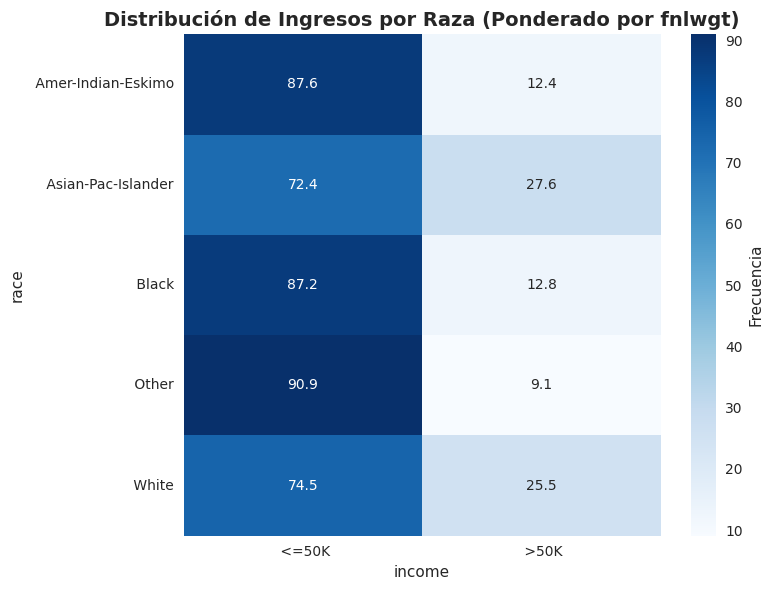

In [70]:
print("TABLA DE CONTINGENCIA: RAZA × INGRESOS")
print("="*50)

race_income_weighted = create_contingency_table(df_clean, 'race', 'income', weighted=True)
print("\nTabla de contingencia PONDERADA (usando fnlwgt):")
print(race_income_weighted)

print("\nPorcentajes por filas (distribución de ingresos por raza):")
race_income_pct = calculate_percentages(race_income_weighted, axis=1)
print(race_income_pct.round(2))

plot_contingency_heatmap(race_income_pct, 
                        "Distribución de Ingresos por Raza (Ponderado por fnlwgt)", 
                        figsize=(8, 6))

TABLA DE CONTINGENCIA: SEXO × OCUPACIÓN

Tabla de contingencia PONDERADA (usando fnlwgt):
occupation  Adm-clerical  Armed-Forces  Craft-repair  Exec-managerial  \
sex                                                                     
Female         478233687             0      44535895        213141004   
Male           245769917       1938833     743015631        536686371   

occupation  Farming-fishing  Handlers-cleaners  Machine-op-inspct  \
sex                                                                 
Female             11390013           33560806          102238340   
Male              157779022          246454873          288233497   

occupation  Other-service  Priv-house-serv  Prof-specialty  Protective-serv  \
sex                                                                           
Female          323519685         28437875       425696758         16549862   
Male            297945165          1527146       689129145        114574068   

occupation      Sales  

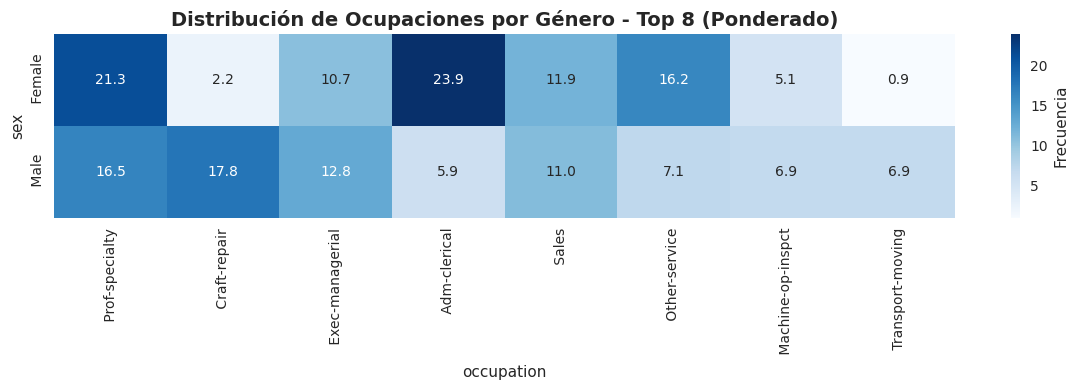

In [71]:
print("TABLA DE CONTINGENCIA: SEXO × OCUPACIÓN")
print("="*50)

sex_occupation_weighted = create_contingency_table(df_clean, 'sex', 'occupation', weighted=True)
print("\nTabla de contingencia PONDERADA (usando fnlwgt):")
print(sex_occupation_weighted)

print("\nPorcentajes por filas (distribución de ocupaciones por género):")
sex_occupation_pct = calculate_percentages(sex_occupation_weighted, axis=1)
print(sex_occupation_pct.round(2))

print("\nTop 8 ocupaciones más comunes:")
top_occupations = sex_occupation_weighted.sum().nlargest(8).index
sex_occupation_top = sex_occupation_pct[top_occupations]

plot_contingency_heatmap(sex_occupation_top, 
                        "Distribución de Ocupaciones por Género - Top 8 (Ponderado)", 
                        figsize=(12, 4))

TABLA DE CONTINGENCIA: RAZA × OCUPACIÓN

Tabla de contingencia PONDERADA (usando fnlwgt):
occupation          Adm-clerical  Armed-Forces  Craft-repair  Exec-managerial  \
race                                                                            
Amer-Indian-Eskimo       3150264         76313       6186677          3439902   
Asian-Pac-Islander      23080803             0      15407420         21769778   
Black                  109137505        301010      58257310         55392417   
Other                    5309724             0       5933393          1866036   
White                  583325308       1561510     701766726        667359242   

occupation          Farming-fishing  Handlers-cleaners  Machine-op-inspct  \
race                                                                        
Amer-Indian-Eskimo          1130181            2332932            2889622   
Asian-Pac-Islander          2635361            3171227           10467242   
Black                       925543

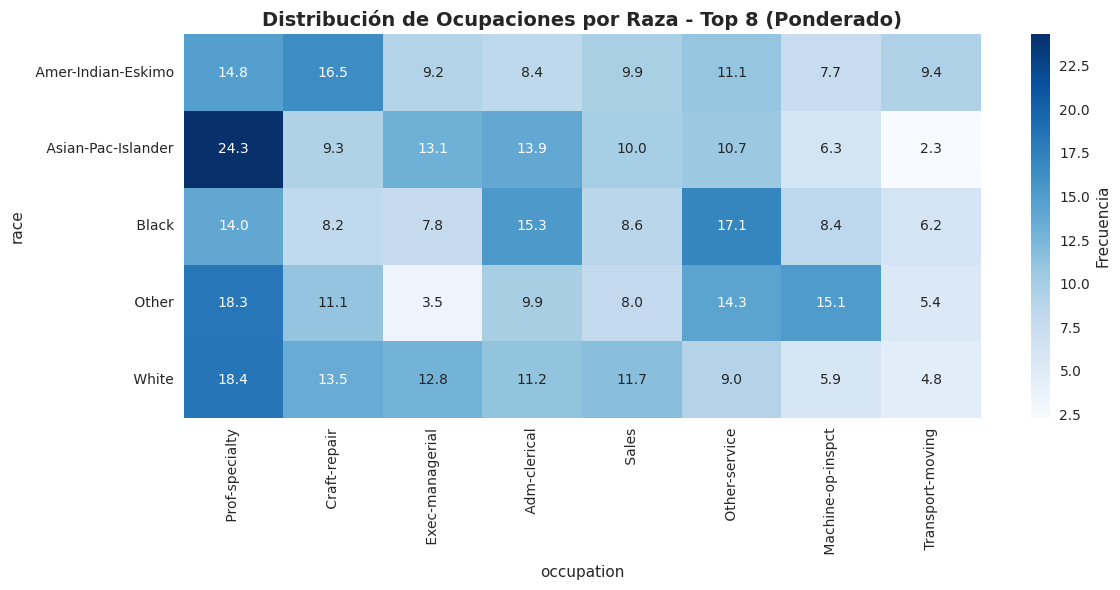

In [72]:
print("TABLA DE CONTINGENCIA: RAZA × OCUPACIÓN")
print("="*50)

race_occupation_weighted = create_contingency_table(df_clean, 'race', 'occupation', weighted=True)
print("\nTabla de contingencia PONDERADA (usando fnlwgt):")
print(race_occupation_weighted)

print("\nPorcentajes por filas (distribución de ocupaciones por raza):")
race_occupation_pct = calculate_percentages(race_occupation_weighted, axis=1)
print(race_occupation_pct.round(2))

print("\nTop 8 ocupaciones más comunes:")
race_occupation_top = race_occupation_pct[top_occupations]

plot_contingency_heatmap(race_occupation_top, 
                        "Distribución de Ocupaciones por Raza - Top 8 (Ponderado)", 
                        figsize=(12, 6))

TABLA DE CONTINGENCIA: SEXO × EDUCACIÓN

Tabla de contingencia PONDERADA (usando fnlwgt):
education       10th       11th      12th   1st-4th   5th-6th   7th-8th  \
sex                                                                       
Female      55263238   83724393  26339061   9346742  18706398  28665353   
Male       128381452  145316098  59870160  30856162  58698897  92833792   

education       9th  Assoc-acdm  Assoc-voc  Bachelors  Doctorate     HS-grad  \
sex                                                                            
Female     30229145    75524565   93241408  294847544   16422409   635558915   
Male       73848179   130858943  158194167  712191880   60684179  1354787391   

education    Masters  Preschool  Prof-school  Some-college  
sex                                                         
Female      94593728    3183366     15731328     519295925  
Male       215291893    8846992     91210967     856828722  

Porcentajes por filas (distribución de educ

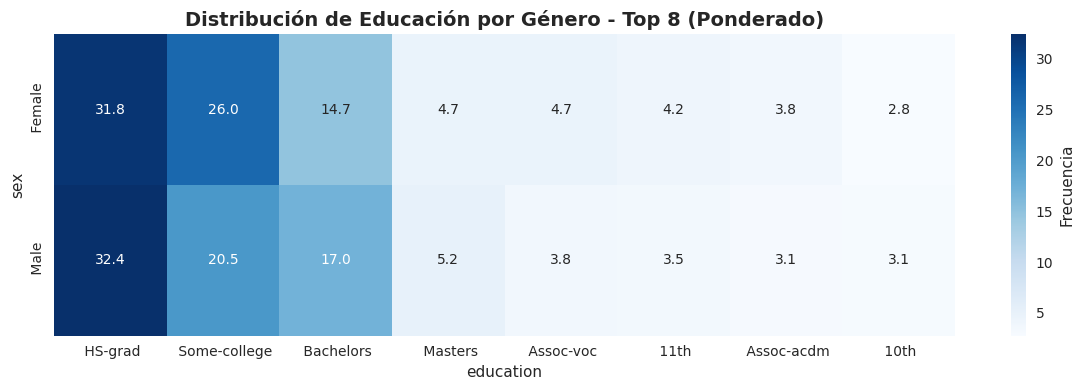

In [73]:
print("TABLA DE CONTINGENCIA: SEXO × EDUCACIÓN")
print("="*50)

sex_education_weighted = create_contingency_table(df_clean, 'sex', 'education', weighted=True)
print("\nTabla de contingencia PONDERADA (usando fnlwgt):")
print(sex_education_weighted)

print("\nPorcentajes por filas (distribución de educación por género):")
sex_education_pct = calculate_percentages(sex_education_weighted, axis=1)
print(sex_education_pct.round(2))

print("\nTop 8 niveles educativos más comunes:")
top_education_levels = sex_education_weighted.sum().nlargest(8).index
sex_education_top = sex_education_pct[top_education_levels]

plot_contingency_heatmap(sex_education_top, 
                        "Distribución de Educación por Género - Top 8 (Ponderado)", 
                        figsize=(12, 4))

TABLA DE CONTINGENCIA: RAZA × EDUCACIÓN

Tabla de contingencia PONDERADA (usando fnlwgt):
education                10th       11th      12th   1st-4th   5th-6th  \
race                                                                     
Amer-Indian-Eskimo    2004098    1527792    419886    536894    393127   
Asian-Pac-Islander    2343915    3154056   1425734    799857   1836205   
Black                28541538   35284786  18482279   2824508   4310457   
Other                 1873540    1829266   2846953   2026916   3007277   
White               148881599  187244591  63034369  34014729  67858229   

education             7th-8th       9th  Assoc-acdm  Assoc-voc  Bachelors  \
race                                                                        
Amer-Indian-Eskimo    1288788    588767      912426    2390551    2743337   
Asian-Pac-Islander    1450355   1495792     5480292    5369275   48971726   
Black                12066183  18069822    22310399   25292226   79398010   
Other 

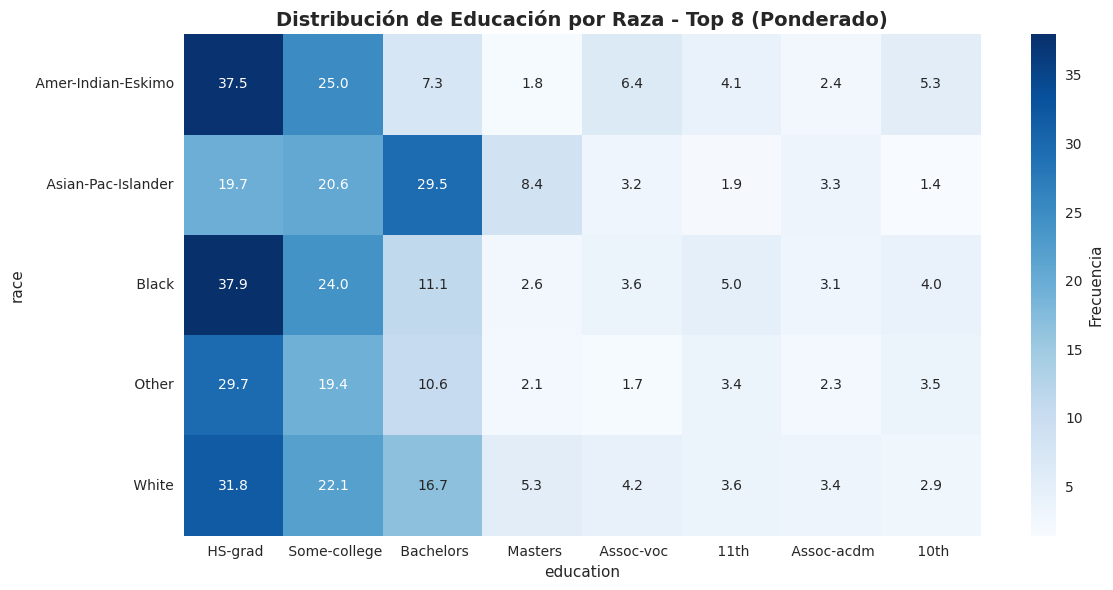

In [74]:
print("TABLA DE CONTINGENCIA: RAZA × EDUCACIÓN")
print("="*50)

race_education_weighted = create_contingency_table(df_clean, 'race', 'education', weighted=True)
print("\nTabla de contingencia PONDERADA (usando fnlwgt):")
print(race_education_weighted)

print("\nPorcentajes por filas (distribución de educación por raza):")
race_education_pct = calculate_percentages(race_education_weighted, axis=1)
print(race_education_pct.round(2))

race_education_top = race_education_pct[top_education_levels]

plot_contingency_heatmap(race_education_top, 
                        "Distribución de Educación por Raza - Top 8 (Ponderado)", 
                        figsize=(12, 6))

TABLA DE CONTINGENCIA: OCUPACIÓN × EDUCACIÓN

Tabla de contingencia PONDERADA (usando fnlwgt):
education              10th      11th      12th  1st-4th   5th-6th   7th-8th  \
occupation                                                                     
Adm-clerical        6859027  13022198   8884051        0   1344856   1664029   
Armed-Forces              0         0    172716        0         0         0   
Craft-repair       31352024  36162120  11081227  6081702  10319487  23597563   
Exec-managerial     5309910   5475489   1910111   559611    162130   3094292   
Farming-fishing     8122494   6179302   3265489  5898451   9342309  13389385   
Handlers-cleaners  15489131  23876382   8039358  4488668   9652999   9989874   
Machine-op-inspct  20097806  19075098   8415511  5834782  11789320  17725145   
Other-service      37643627  44556358  16386570  8135527  15812224  17479545   
Priv-house-serv     1111436   3074204    904684  2391336   3488302   1756990   
Prof-specialty     224883

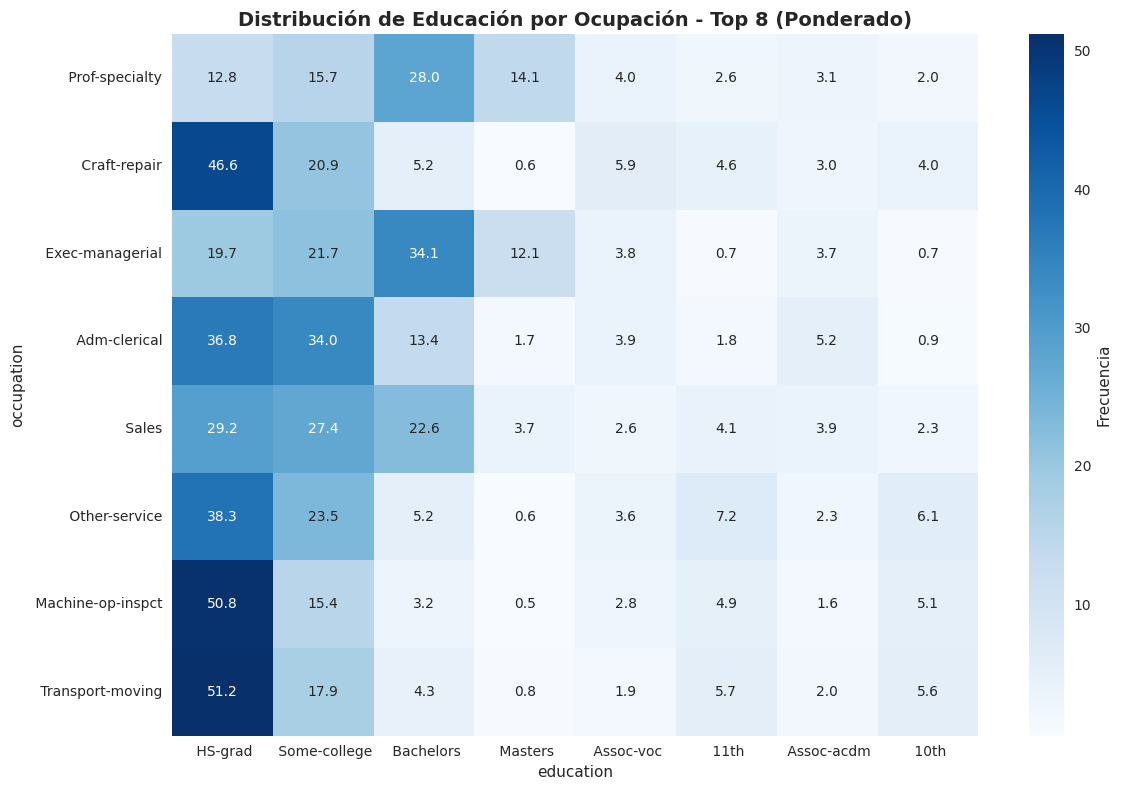

In [75]:
print("TABLA DE CONTINGENCIA: OCUPACIÓN × EDUCACIÓN")
print("="*50)

occupation_education_weighted = create_contingency_table(df_clean, 'occupation', 'education', weighted=True)
print("\nTabla de contingencia PONDERADA (usando fnlwgt):")
print(occupation_education_weighted)

print("\nPorcentajes por filas (distribución de educación por ocupación):")
occupation_education_pct = calculate_percentages(occupation_education_weighted, axis=1)
print(occupation_education_pct.round(2))

occupation_education_top = occupation_education_pct.loc[top_occupations, top_education_levels]

plot_contingency_heatmap(occupation_education_top, 
                        "Distribución de Educación por Ocupación - Top 8 (Ponderado)", 
                        figsize=(12, 8))

2. Relaciones Trivariadas


In [76]:
def create_trivariate_table(df, var1, var2, var3, weighted=False, income_filter=None):
    if income_filter:
        df_filtered = df[df['income'] == income_filter].copy()
    else:
        df_filtered = df.copy()
    
    if weighted:
        table = df_filtered.groupby([var1, var2, var3])['fnlwgt'].sum().unstack(fill_value=0)
    else:
        table = df_filtered.groupby([var1, var2, var3]).size().unstack(fill_value=0)
    
    return table

def plot_trivariate_heatmap(table, title, figsize=(12, 8)):
    plt.figure(figsize=figsize)
    
    sns.heatmap(table, 
                annot=True, 
                fmt='.0f', 
                cmap='YlOrRd', 
                cbar_kws={'label': 'Frecuencia'})
    
    plt.title(title, fontweight='bold', fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def plot_trivariate_comparison(unweighted_table, weighted_table, title_prefix, figsize=(20, 8)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    sns.heatmap(unweighted_table, 
                annot=True, 
                fmt='.0f', 
                cmap='Blues', 
                ax=ax1,
                cbar_kws={'label': 'Frecuencia'})
    ax1.set_title(f'{title_prefix} - No Ponderado', fontweight='bold')
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    ax1.tick_params(axis='x', rotation=45)
    ax1.tick_params(axis='y', rotation=0)
    
    sns.heatmap(weighted_table, 
                annot=True, 
                fmt='.0f', 
                cmap='Reds', 
                ax=ax2,
                cbar_kws={'label': 'Frecuencia Ponderada'})
    ax2.set_title(f'{title_prefix} - Ponderado', fontweight='bold')
    ax2.set_xlabel('')
    ax2.set_ylabel('')
    ax2.tick_params(axis='x', rotation=45)
    ax2.tick_params(axis='y', rotation=0)
    
    plt.tight_layout()
    plt.show()

def calculate_trivariate_percentages(table, axis=0):
    return table.div(table.sum(axis=axis), axis=1-axis) * 100


ANÁLISIS TRIVARIADO: SEXO × RAZA × INGRESOS

1. ANÁLISIS COMPLETO - SEXO × RAZA × INGRESOS
--------------------------------------------------

Tabla NO PONDERADA:
income                     <=50K  >50K
sex    race                           
Female Amer-Indian-Eskimo    107    12
       Asian-Pac-Islander    303    43
       Black                1465    90
       Other                 103     6
       White                7614  1028
Male   Amer-Indian-Eskimo    168    24
       Asian-Pac-Islander    460   233
       Black                1272   297
       Other                 143    19
       White               13085  6089

Tabla PONDERADA:
income                          <=50K        >50K
sex    race                                      
Female Amer-Indian-Eskimo    11664993     1776144
       Asian-Pac-Islander    44894096     6124322
       Black                312647965    18522543
       Other                 17843301      961340
       White               1397055711   189183103
M

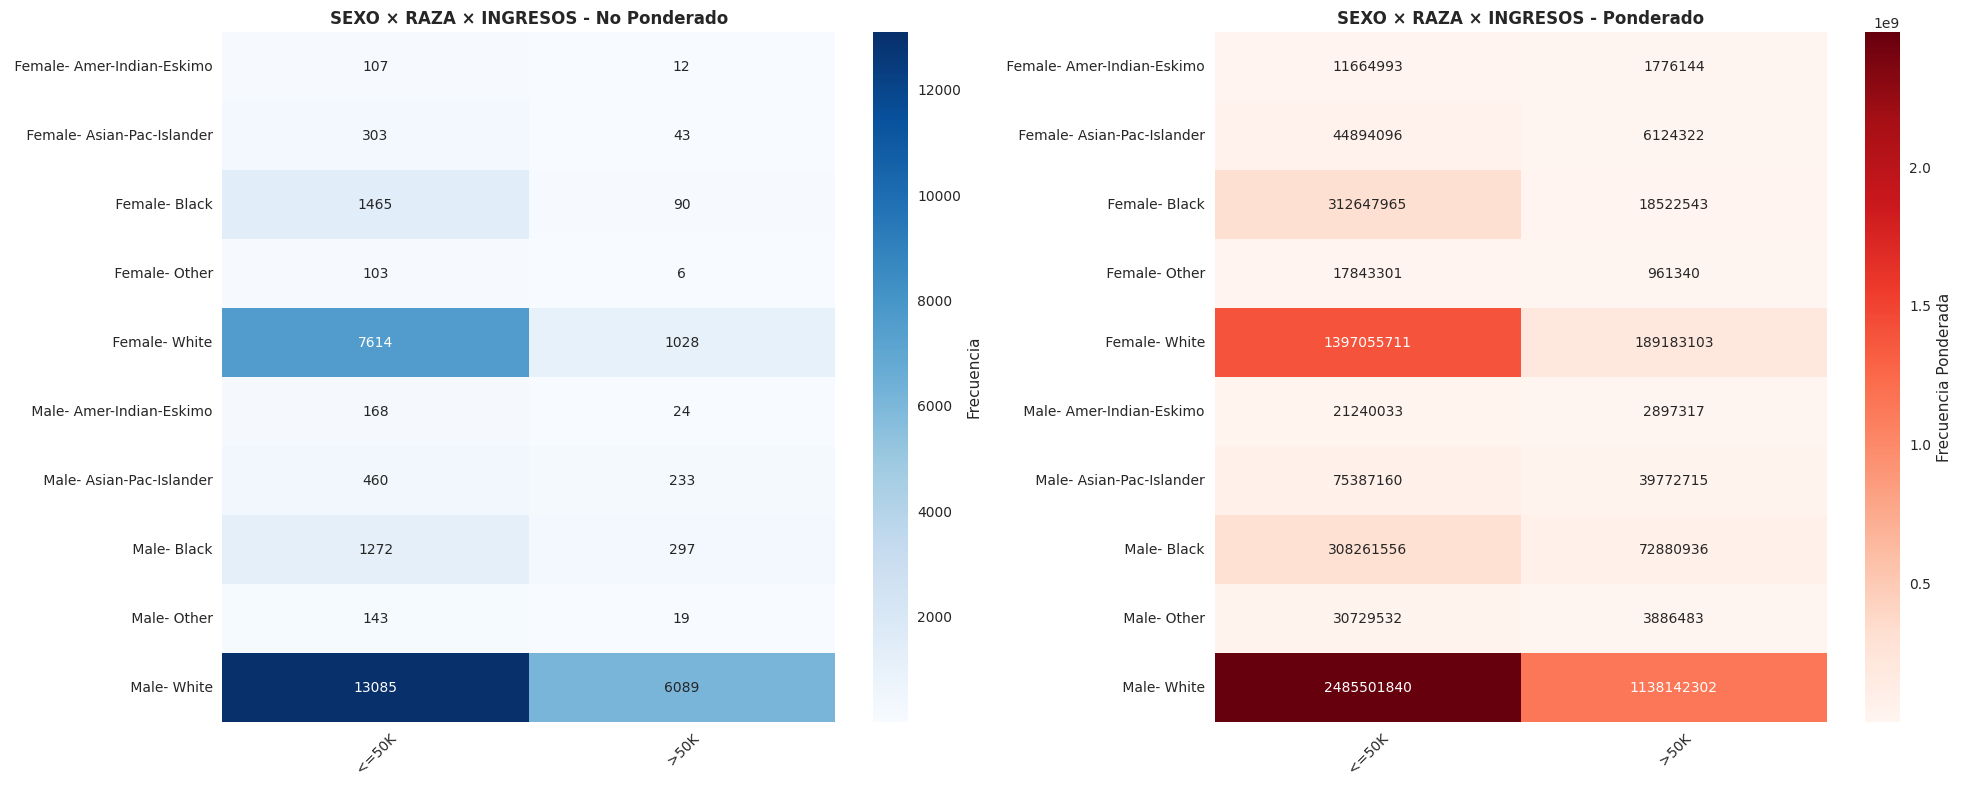



2. ANÁLISIS PARA INGRESOS ALTOS (>50K) - SEXO × RAZA
--------------------------------------------------

Tabla NO PONDERADA (>50K):
income                     >50K
sex    race                    
Female Amer-Indian-Eskimo    12
       Asian-Pac-Islander    43
       Black                 90
       Other                  6
       White               1028
Male   Amer-Indian-Eskimo    24
       Asian-Pac-Islander   233
       Black                297
       Other                 19
       White               6089

Tabla PONDERADA (>50K):
income                           >50K
sex    race                          
Female Amer-Indian-Eskimo     1776144
       Asian-Pac-Islander     6124322
       Black                 18522543
       Other                   961340
       White                189183103
Male   Amer-Indian-Eskimo     2897317
       Asian-Pac-Islander    39772715
       Black                 72880936
       Other                  3886483
       White               1138142302


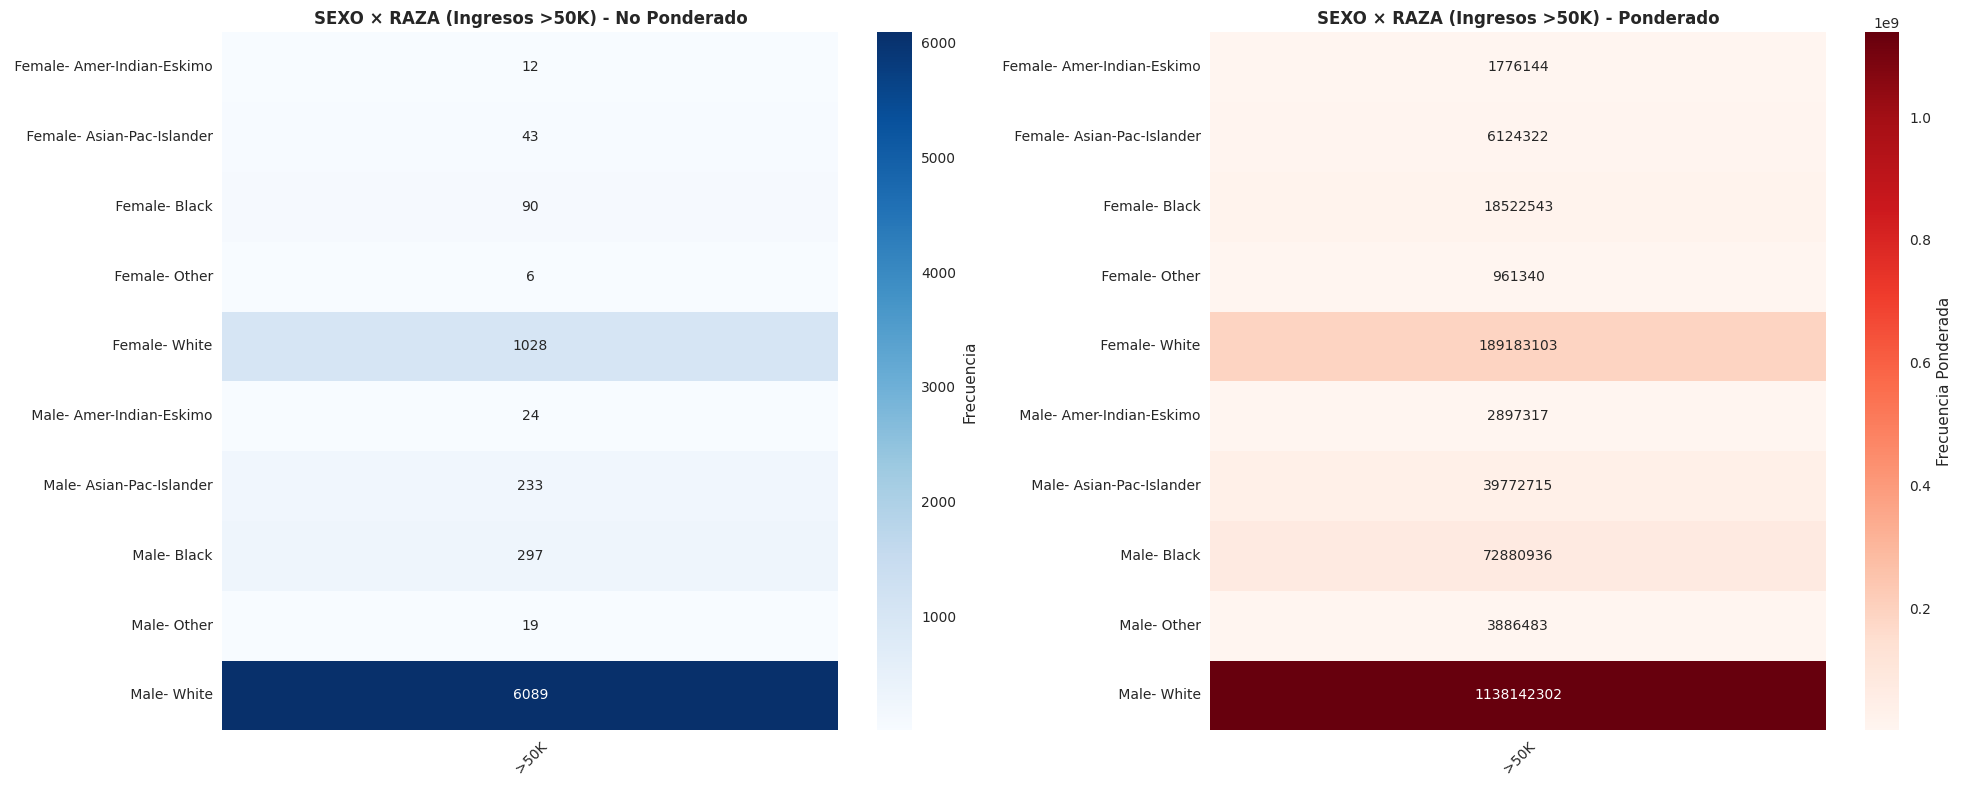



3. ANÁLISIS PARA INGRESOS BAJOS (<=50K) - SEXO × RAZA
--------------------------------------------------

Tabla NO PONDERADA (<=50K):
income                     <=50K
sex    race                     
Female Amer-Indian-Eskimo    107
       Asian-Pac-Islander    303
       Black                1465
       Other                 103
       White                7614
Male   Amer-Indian-Eskimo    168
       Asian-Pac-Islander    460
       Black                1272
       Other                 143
       White               13085

Tabla PONDERADA (<=50K):
income                          <=50K
sex    race                          
Female Amer-Indian-Eskimo    11664993
       Asian-Pac-Islander    44894096
       Black                312647965
       Other                 17843301
       White               1397055711
Male   Amer-Indian-Eskimo    21240033
       Asian-Pac-Islander    75387160
       Black                308261556
       Other                 30729532
       White            

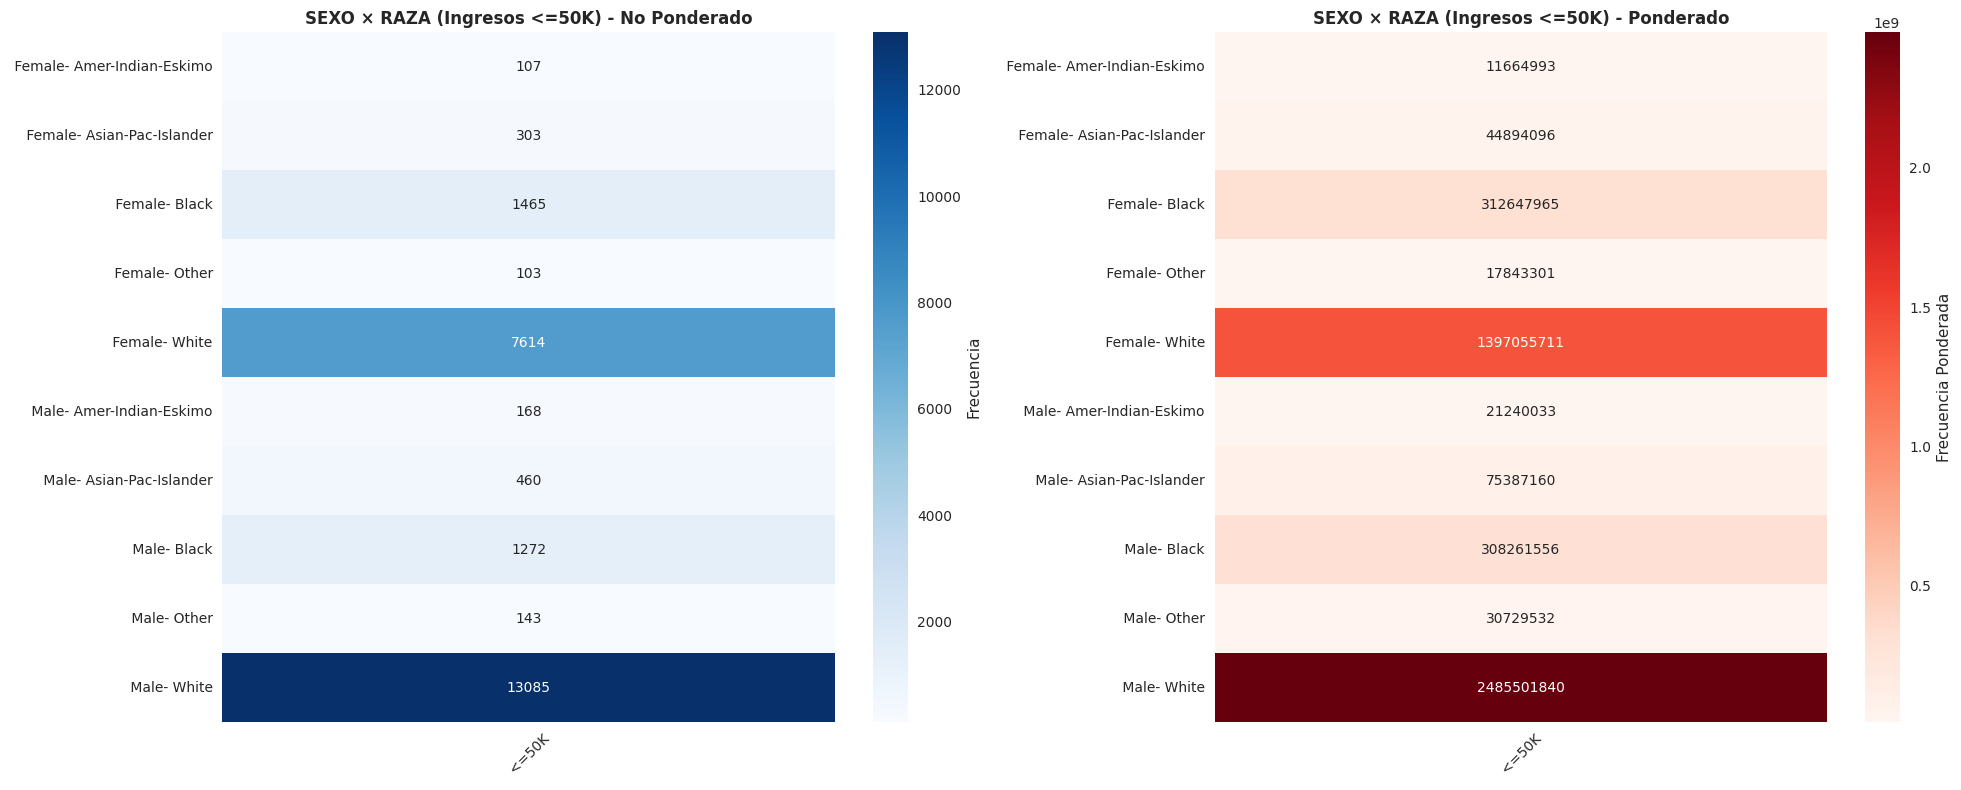

In [77]:
print("ANÁLISIS TRIVARIADO: SEXO × RAZA × INGRESOS")
print("="*50)

print("\n1. ANÁLISIS COMPLETO - SEXO × RAZA × INGRESOS")
print("-" * 50)

sex_race_income_unweighted = create_trivariate_table(df_clean, 'sex', 'race', 'income', weighted=False)
print("\nTabla NO PONDERADA:")
print(sex_race_income_unweighted)

sex_race_income_weighted = create_trivariate_table(df_clean, 'sex', 'race', 'income', weighted=True)
print("\nTabla PONDERADA:")
print(sex_race_income_weighted)

plot_trivariate_comparison(sex_race_income_unweighted, sex_race_income_weighted, 
                          "SEXO × RAZA × INGRESOS")

print("\n\n2. ANÁLISIS PARA INGRESOS ALTOS (>50K) - SEXO × RAZA")
print("-" * 50)

sex_race_high_unweighted = create_trivariate_table(df_clean, 'sex', 'race', 'income', 
                                                   weighted=False, income_filter=' >50K')
print("\nTabla NO PONDERADA (>50K):")
print(sex_race_high_unweighted)

sex_race_high_weighted = create_trivariate_table(df_clean, 'sex', 'race', 'income', 
                                                 weighted=True, income_filter=' >50K')
print("\nTabla PONDERADA (>50K):")
print(sex_race_high_weighted)

plot_trivariate_comparison(sex_race_high_unweighted, sex_race_high_weighted, 
                          "SEXO × RAZA (Ingresos >50K)")

print("\n\n3. ANÁLISIS PARA INGRESOS BAJOS (<=50K) - SEXO × RAZA")
print("-" * 50)

sex_race_low_unweighted = create_trivariate_table(df_clean, 'sex', 'race', 'income', 
                                                  weighted=False, income_filter=' <=50K')
print("\nTabla NO PONDERADA (<=50K):")
print(sex_race_low_unweighted)

sex_race_low_weighted = create_trivariate_table(df_clean, 'sex', 'race', 'income', 
                                                weighted=True, income_filter=' <=50K')
print("\nTabla PONDERADA (<=50K):")
print(sex_race_low_weighted)

plot_trivariate_comparison(sex_race_low_unweighted, sex_race_low_weighted, 
                          "SEXO × RAZA (Ingresos <=50K)")

ANÁLISIS TRIVARIADO: SEXO × EDUCACIÓN × INGRESOS

1. ANÁLISIS COMPLETO - SEXO × EDUCACIÓN × INGRESOS
--------------------------------------------------

Tabla NO PONDERADA:
income               <=50K  >50K
sex    education                
Female 10th            292     3
       11th            424     8
       12th            140     4
       1st-4th          46     0
       5th-6th          82     2
       7th-8th         159     1
       9th             139     5
       Assoc-acdm      365    56
       Assoc-voc       433    67
       Bachelors      1280   339
       Doctorate        36    50
       HS-grad        3164   226
       Masters         357   179
       Preschool        16     0
       Prof-school      50    42
       Some-college   2609   197
Male   10th            579    59
       11th            691    52
       12th            260    29
       1st-4th         116     6
       5th-6th         235    14
       7th-8th         447    39
       9th             348    22
  

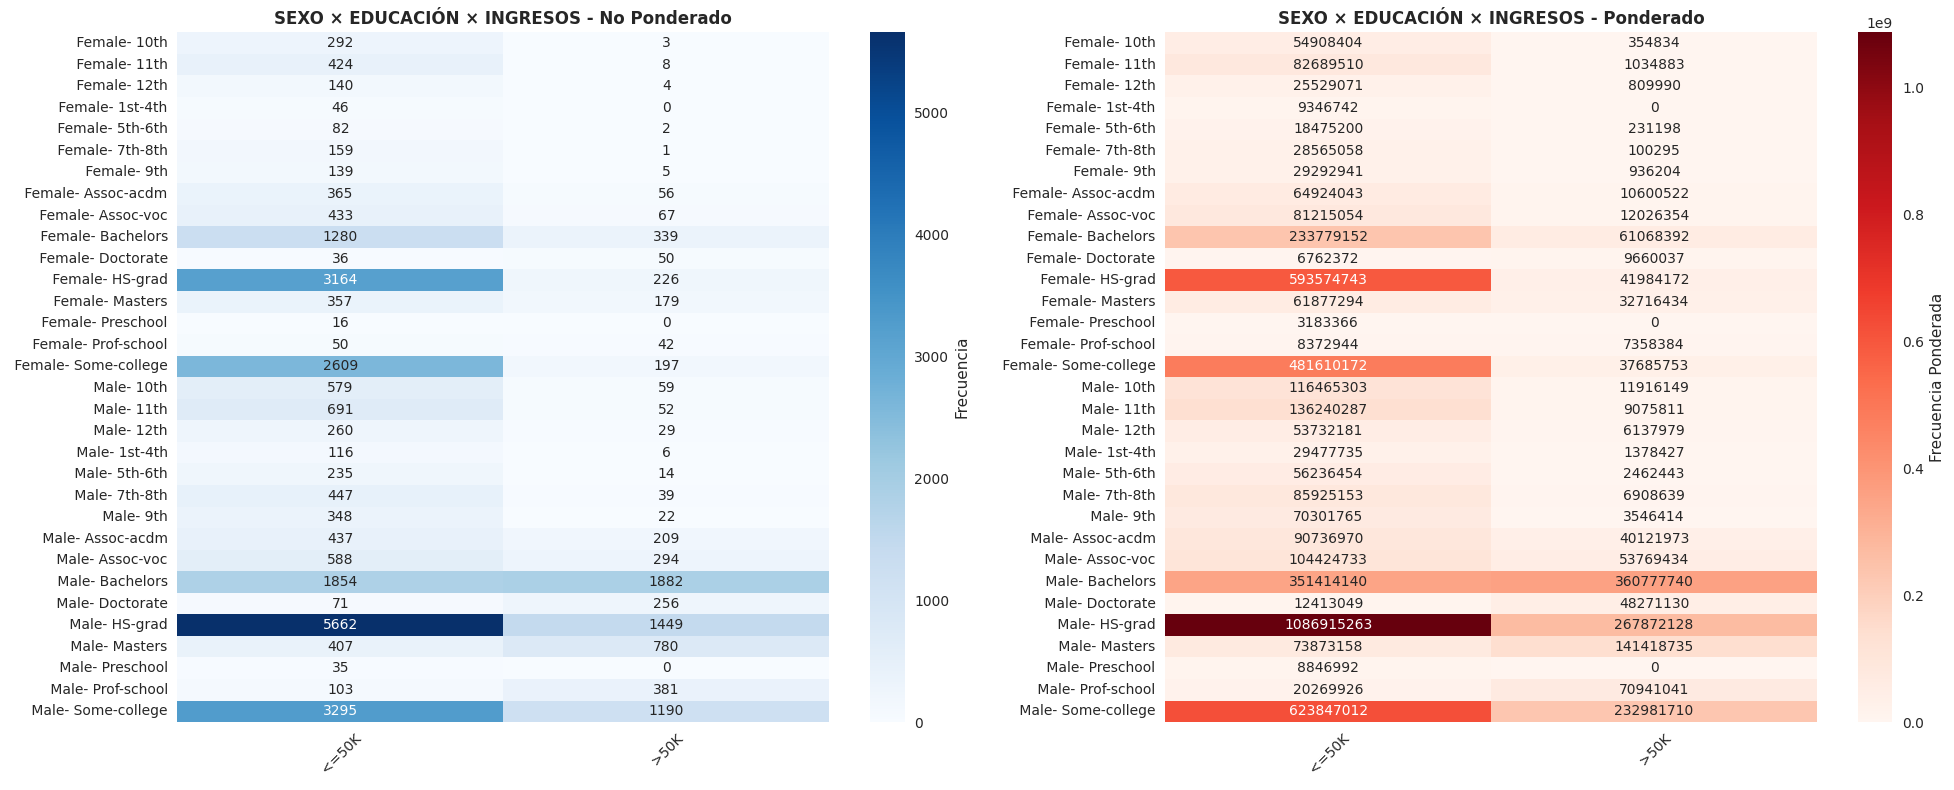



2. ANÁLISIS PARA INGRESOS ALTOS (>50K) - SEXO × EDUCACIÓN
--------------------------------------------------

Tabla NO PONDERADA (>50K):
income               >50K
sex    education         
Female 10th             3
       11th             8
       12th             4
       5th-6th          2
       7th-8th          1
       9th              5
       Assoc-acdm      56
       Assoc-voc       67
       Bachelors      339
       Doctorate       50
       HS-grad        226
       Masters        179
       Prof-school     42
       Some-college   197
Male   10th            59
       11th            52
       12th            29
       1st-4th          6
       5th-6th         14
       7th-8th         39
       9th             22
       Assoc-acdm     209
       Assoc-voc      294
       Bachelors     1882
       Doctorate      256
       HS-grad       1449
       Masters        780
       Prof-school    381
       Some-college  1190

Tabla PONDERADA (>50K):
income                    >50K

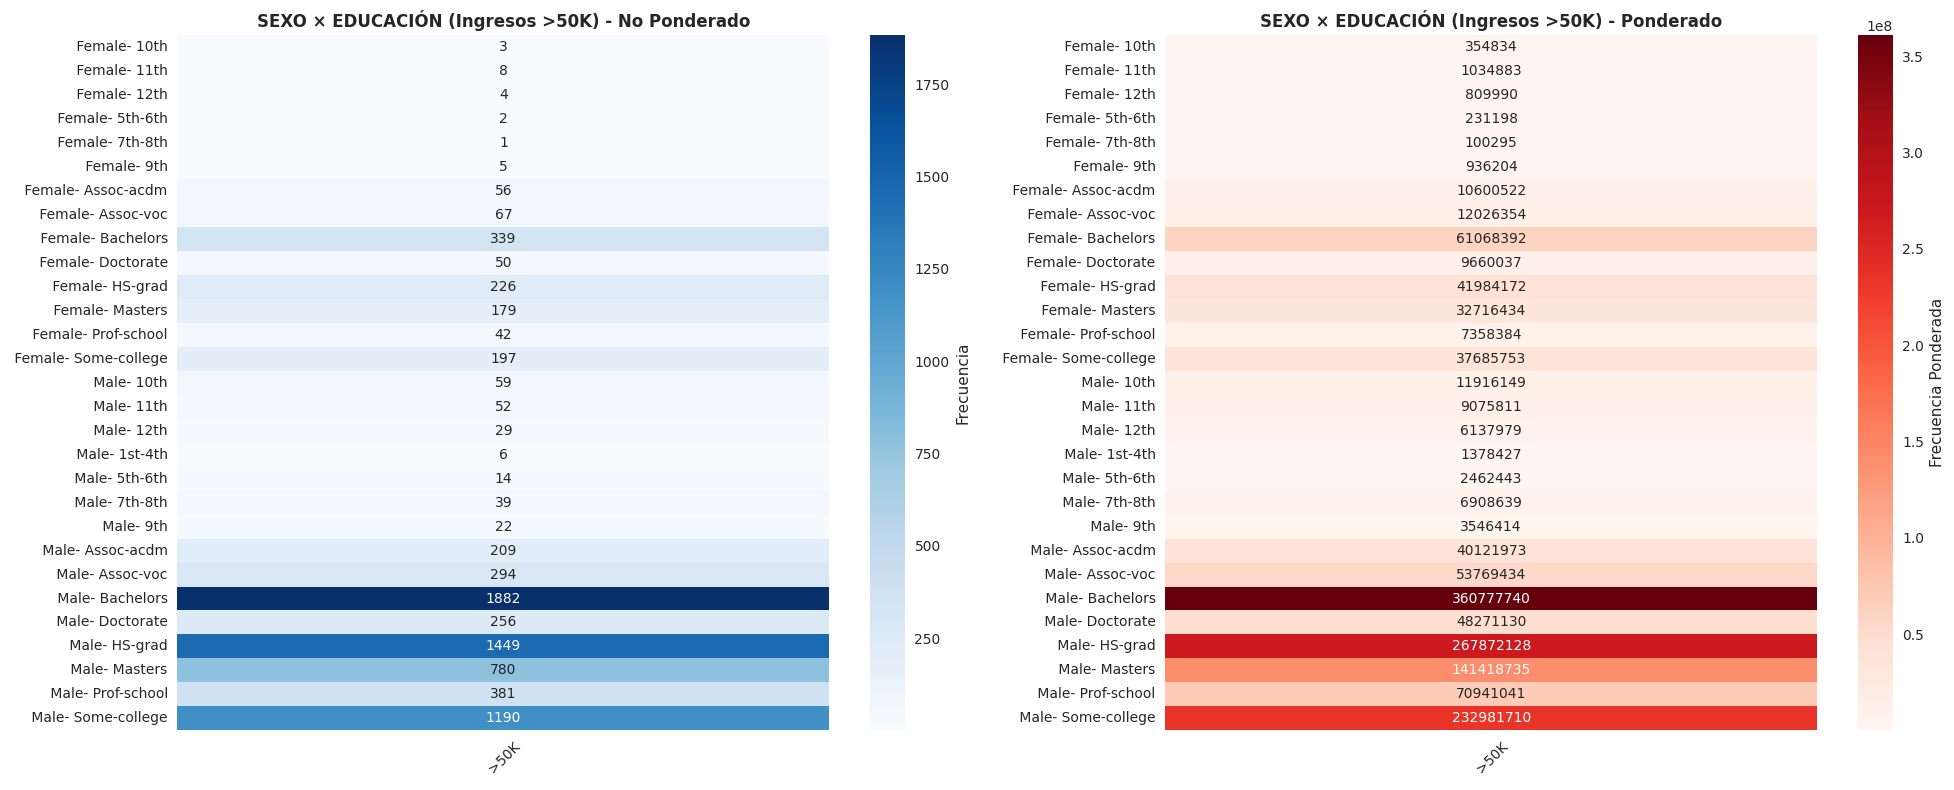



3. ANÁLISIS PARA INGRESOS BAJOS (<=50K) - SEXO × EDUCACIÓN
--------------------------------------------------

Tabla NO PONDERADA (<=50K):
income               <=50K
sex    education          
Female 10th            292
       11th            424
       12th            140
       1st-4th          46
       5th-6th          82
       7th-8th         159
       9th             139
       Assoc-acdm      365
       Assoc-voc       433
       Bachelors      1280
       Doctorate        36
       HS-grad        3164
       Masters         357
       Preschool        16
       Prof-school      50
       Some-college   2609
Male   10th            579
       11th            691
       12th            260
       1st-4th         116
       5th-6th         235
       7th-8th         447
       9th             348
       Assoc-acdm      437
       Assoc-voc       588
       Bachelors      1854
       Doctorate        71
       HS-grad        5662
       Masters         407
       Preschool      

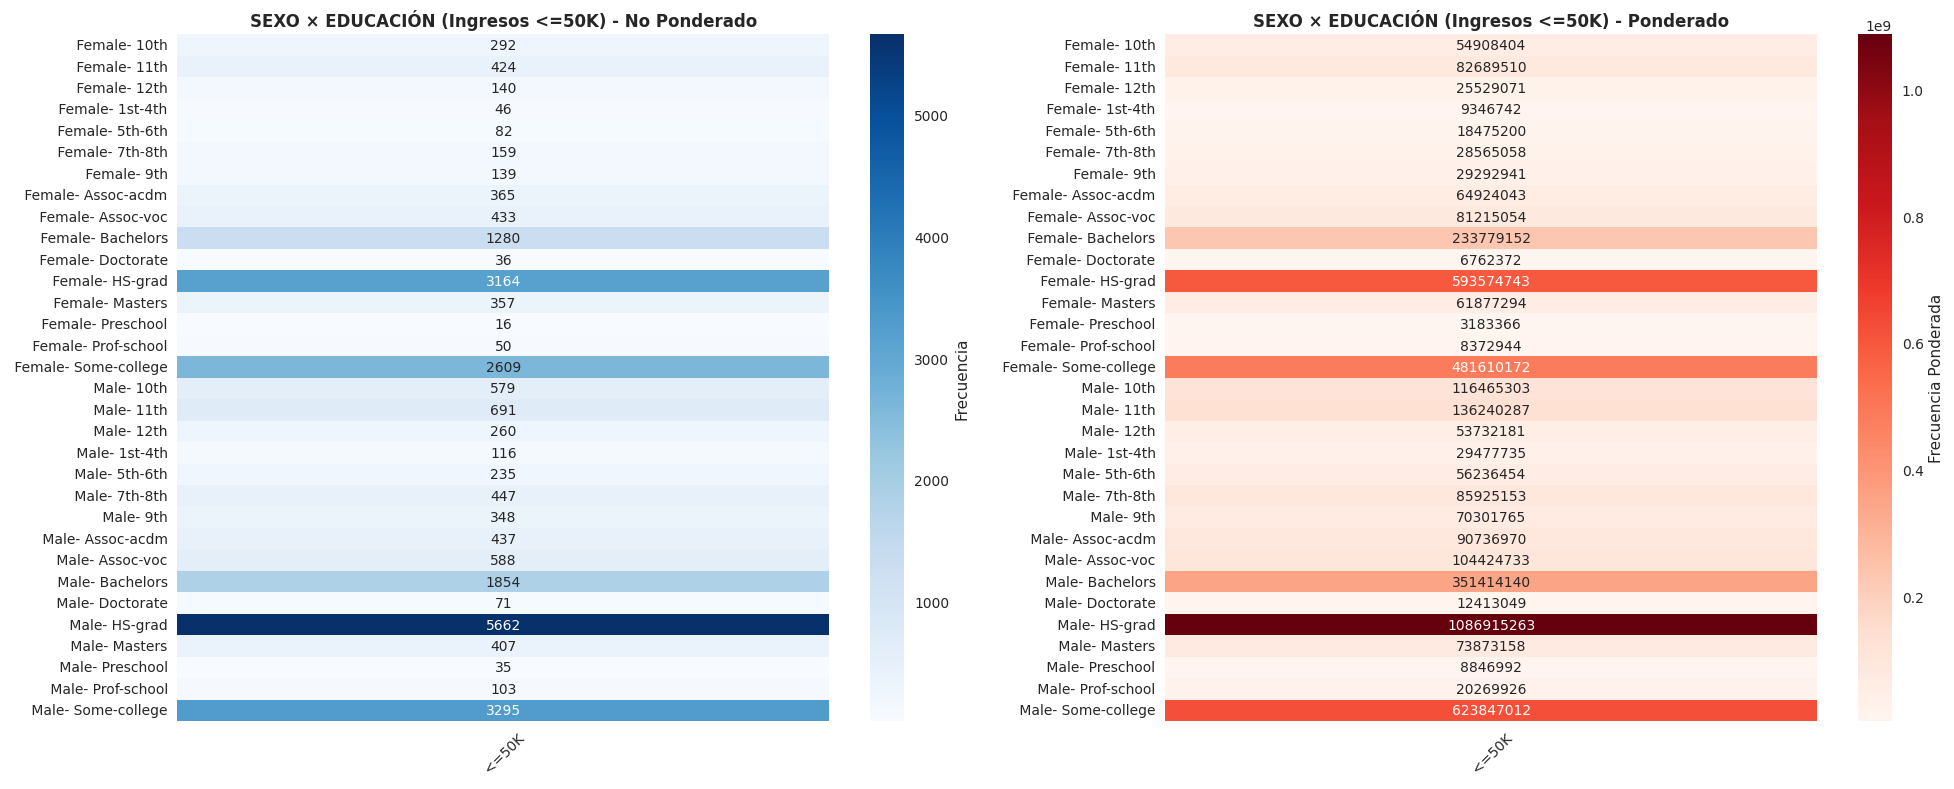

In [78]:
print("ANÁLISIS TRIVARIADO: SEXO × EDUCACIÓN × INGRESOS")
print("="*50)

print("\n1. ANÁLISIS COMPLETO - SEXO × EDUCACIÓN × INGRESOS")
print("-" * 50)

sex_education_income_unweighted = create_trivariate_table(df_clean, 'sex', 'education', 'income', weighted=False)
print("\nTabla NO PONDERADA:")
print(sex_education_income_unweighted)

sex_education_income_weighted = create_trivariate_table(df_clean, 'sex', 'education', 'income', weighted=True)
print("\nTabla PONDERADA:")
print(sex_education_income_weighted)

plot_trivariate_comparison(sex_education_income_unweighted, sex_education_income_weighted, 
                          "SEXO × EDUCACIÓN × INGRESOS")

print("\n\n2. ANÁLISIS PARA INGRESOS ALTOS (>50K) - SEXO × EDUCACIÓN")
print("-" * 50)

sex_education_high_unweighted = create_trivariate_table(df_clean, 'sex', 'education', 'income', 
                                                        weighted=False, income_filter=' >50K')
print("\nTabla NO PONDERADA (>50K):")
print(sex_education_high_unweighted)

sex_education_high_weighted = create_trivariate_table(df_clean, 'sex', 'education', 'income', 
                                                      weighted=True, income_filter=' >50K')
print("\nTabla PONDERADA (>50K):")
print(sex_education_high_weighted)

plot_trivariate_comparison(sex_education_high_unweighted, sex_education_high_weighted, 
                          "SEXO × EDUCACIÓN (Ingresos >50K)")

print("\n\n3. ANÁLISIS PARA INGRESOS BAJOS (<=50K) - SEXO × EDUCACIÓN")
print("-" * 50)

sex_education_low_unweighted = create_trivariate_table(df_clean, 'sex', 'education', 'income', 
                                                       weighted=False, income_filter=' <=50K')
print("\nTabla NO PONDERADA (<=50K):")
print(sex_education_low_unweighted)

sex_education_low_weighted = create_trivariate_table(df_clean, 'sex', 'education', 'income', 
                                                     weighted=True, income_filter=' <=50K')
print("\nTabla PONDERADA (<=50K):")
print(sex_education_low_weighted)

plot_trivariate_comparison(sex_education_low_unweighted, sex_education_low_weighted, 
                          "SEXO × EDUCACIÓN (Ingresos <=50K)")

ANÁLISIS TRIVARIADO: OCUPACIÓN × EDUCACIÓN × INGRESOS

1. ANÁLISIS COMPLETO - OCUPACIÓN × EDUCACIÓN × INGRESOS
--------------------------------------------------

Tabla NO PONDERADA:
income                         <=50K  >50K
occupation       education                
Adm-clerical     10th             38     0
                 11th             64     3
                 12th             37     1
                 5th-6th           6     0
                 7th-8th          10     1
...                              ...   ...
Transport-moving Doctorate         1     0
                 HS-grad         657   168
                 Masters           6     4
                 Prof-school       0     3
                 Some-college    210    73

[201 rows x 2 columns]

Tabla PONDERADA:
income                             <=50K      >50K
occupation       education                        
Adm-clerical     10th            6859027         0
                 11th           12236987    785211
            

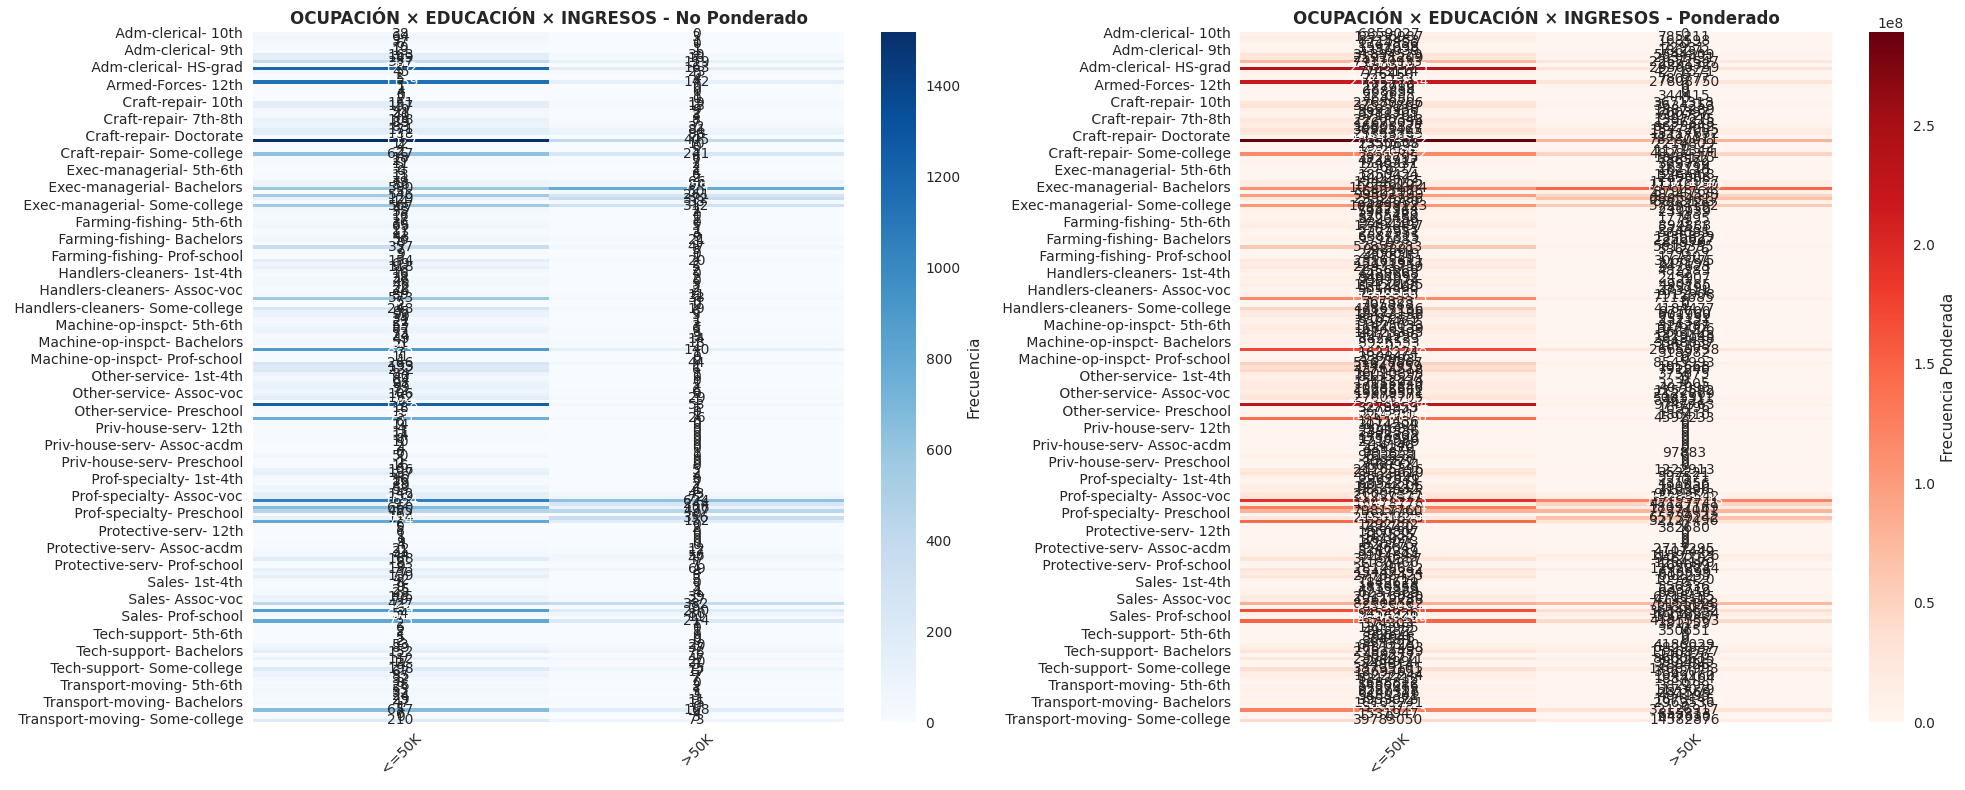



2. ANÁLISIS PARA INGRESOS ALTOS (>50K) - OCUPACIÓN × EDUCACIÓN
--------------------------------------------------

Tabla NO PONDERADA (>50K):
income                         >50K
occupation       education         
Adm-clerical     11th             3
                 12th             1
                 7th-8th          1
                 9th              1
                 Assoc-acdm      30
...                             ...
Transport-moving Bachelors       15
                 HS-grad        168
                 Masters          4
                 Prof-school      3
                 Some-college    73

[153 rows x 1 columns]

Tabla PONDERADA (>50K):
income                             >50K
occupation       education             
Adm-clerical     11th            785211
                 12th            168598
                 7th-8th          72931
                 9th             186272
                 Assoc-acdm     5544809
...                                 ...
Transport-moving Ba

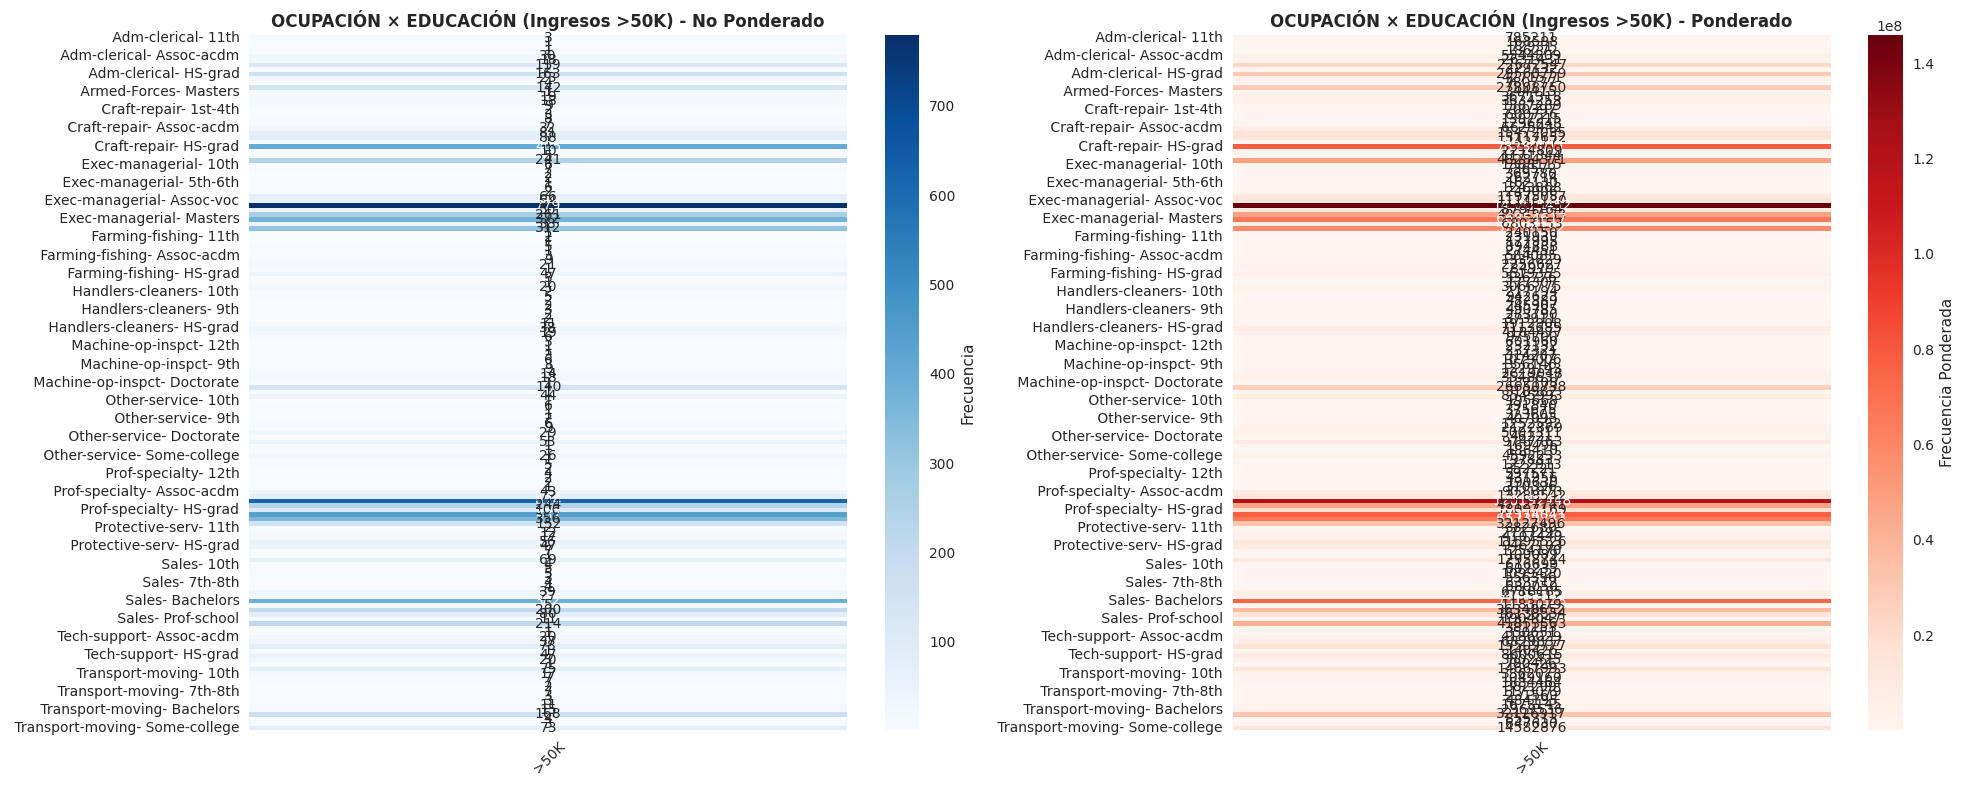



3. ANÁLISIS PARA INGRESOS BAJOS (<=50K) - OCUPACIÓN × EDUCACIÓN
--------------------------------------------------

Tabla NO PONDERADA (<=50K):
income                         <=50K
occupation       education          
Adm-clerical     10th             38
                 11th             64
                 12th             37
                 5th-6th           6
                 7th-8th          10
...                              ...
Transport-moving Bachelors        47
                 Doctorate         1
                 HS-grad         657
                 Masters           6
                 Some-college    210

[194 rows x 1 columns]

Tabla PONDERADA (<=50K):
income                             <=50K
occupation       education              
Adm-clerical     10th            6859027
                 11th           12236987
                 12th            8715453
                 5th-6th         1344856
                 7th-8th         1591098
...                                 

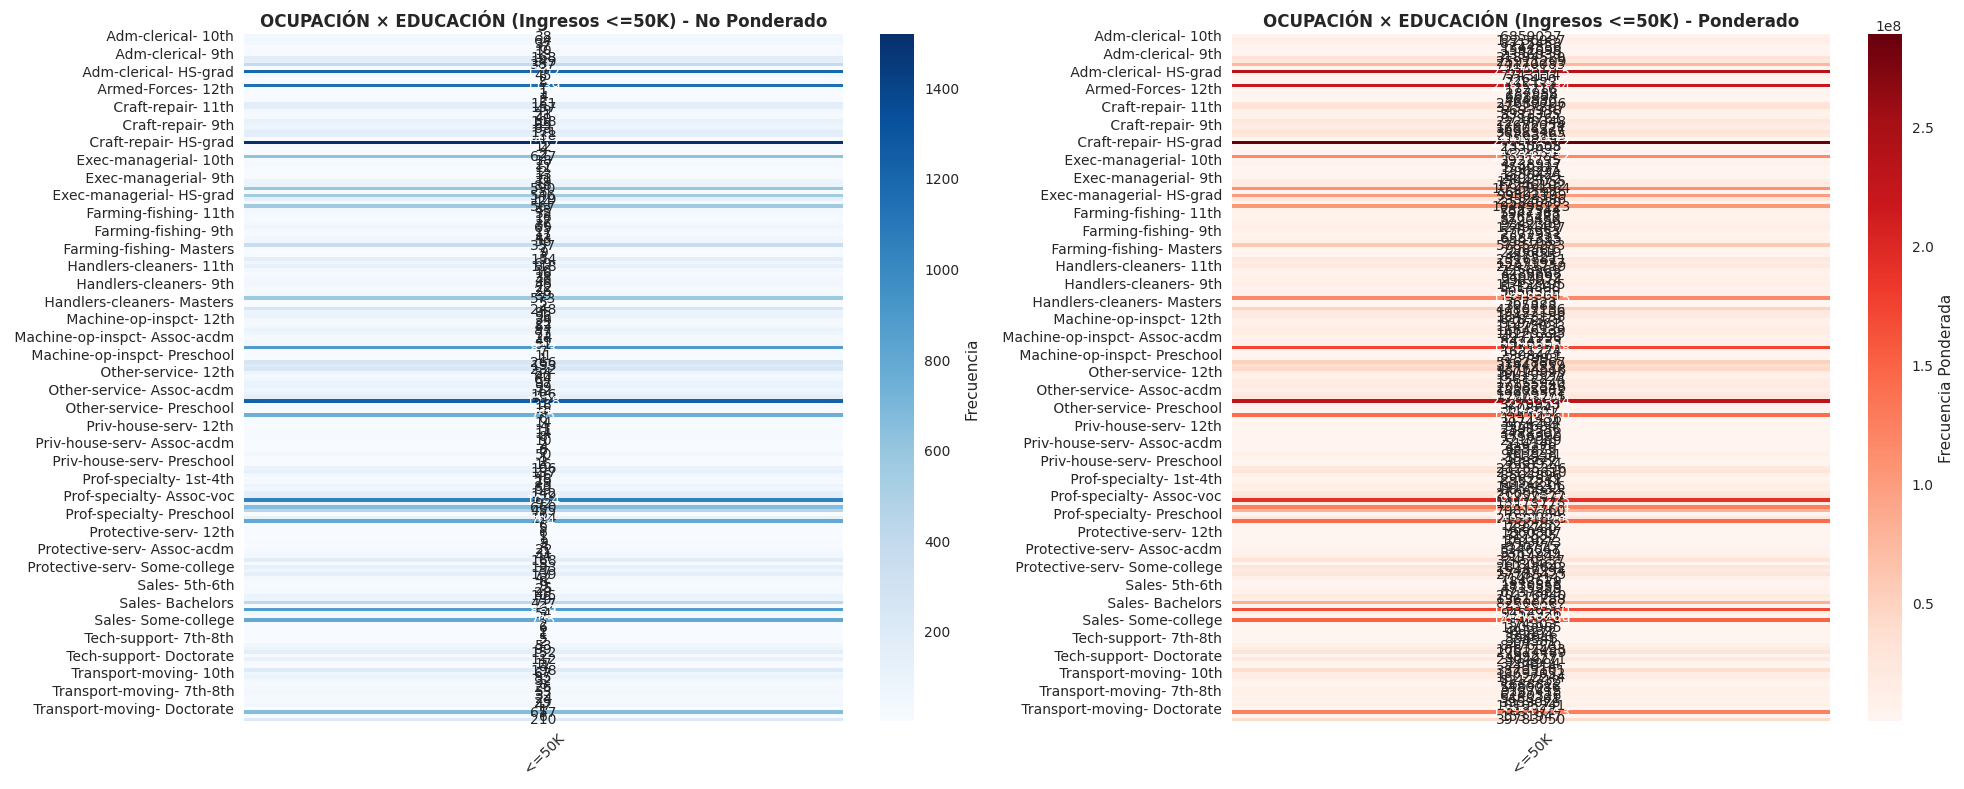

In [79]:
print("ANÁLISIS TRIVARIADO: OCUPACIÓN × EDUCACIÓN × INGRESOS")
print("="*50)

print("\n1. ANÁLISIS COMPLETO - OCUPACIÓN × EDUCACIÓN × INGRESOS")
print("-" * 50)

occupation_education_income_unweighted = create_trivariate_table(df_clean, 'occupation', 'education', 'income', weighted=False)
print("\nTabla NO PONDERADA:")
print(occupation_education_income_unweighted)

occupation_education_income_weighted = create_trivariate_table(df_clean, 'occupation', 'education', 'income', weighted=True)
print("\nTabla PONDERADA:")
print(occupation_education_income_weighted)

plot_trivariate_comparison(occupation_education_income_unweighted, occupation_education_income_weighted, 
                          "OCUPACIÓN × EDUCACIÓN × INGRESOS")

print("\n\n2. ANÁLISIS PARA INGRESOS ALTOS (>50K) - OCUPACIÓN × EDUCACIÓN")
print("-" * 50)

occupation_education_high_unweighted = create_trivariate_table(df_clean, 'occupation', 'education', 'income', 
                                                              weighted=False, income_filter=' >50K')
print("\nTabla NO PONDERADA (>50K):")
print(occupation_education_high_unweighted)

occupation_education_high_weighted = create_trivariate_table(df_clean, 'occupation', 'education', 'income', 
                                                            weighted=True, income_filter=' >50K')
print("\nTabla PONDERADA (>50K):")
print(occupation_education_high_weighted)

plot_trivariate_comparison(occupation_education_high_unweighted, occupation_education_high_weighted, 
                          "OCUPACIÓN × EDUCACIÓN (Ingresos >50K)")

print("\n\n3. ANÁLISIS PARA INGRESOS BAJOS (<=50K) - OCUPACIÓN × EDUCACIÓN")
print("-" * 50)

occupation_education_low_unweighted = create_trivariate_table(df_clean, 'occupation', 'education', 'income', 
                                                             weighted=False, income_filter=' <=50K')
print("\nTabla NO PONDERADA (<=50K):")
print(occupation_education_low_unweighted)

occupation_education_low_weighted = create_trivariate_table(df_clean, 'occupation', 'education', 'income', 
                                                           weighted=True, income_filter=' <=50K')
print("\nTabla PONDERADA (<=50K):")
print(occupation_education_low_weighted)

plot_trivariate_comparison(occupation_education_low_unweighted, occupation_education_low_weighted, 
                          "OCUPACIÓN × EDUCACIÓN (Ingresos <=50K)")

ANÁLISIS TRIVARIADO: RAZA × EDUCACIÓN × INGRESOS

1. ANÁLISIS COMPLETO - RAZA × EDUCACIÓN × INGRESOS
--------------------------------------------------

Tabla NO PONDERADA:
income                           <=50K  >50K
race               education                
Amer-Indian-Eskimo 10th             16     0
                   11th             12     2
                   12th              5     0
                   1st-4th           4     0
                   5th-6th           2     0
...                                ...   ...
White              HS-grad        7362  1542
                   Masters         666   871
                   Preschool        38     0
                   Prof-school     132   382
                   Some-college   4952  1255

[79 rows x 2 columns]

Tabla PONDERADA:
income                                <=50K       >50K
race               education                          
Amer-Indian-Eskimo 10th             2004098          0
                   11th             

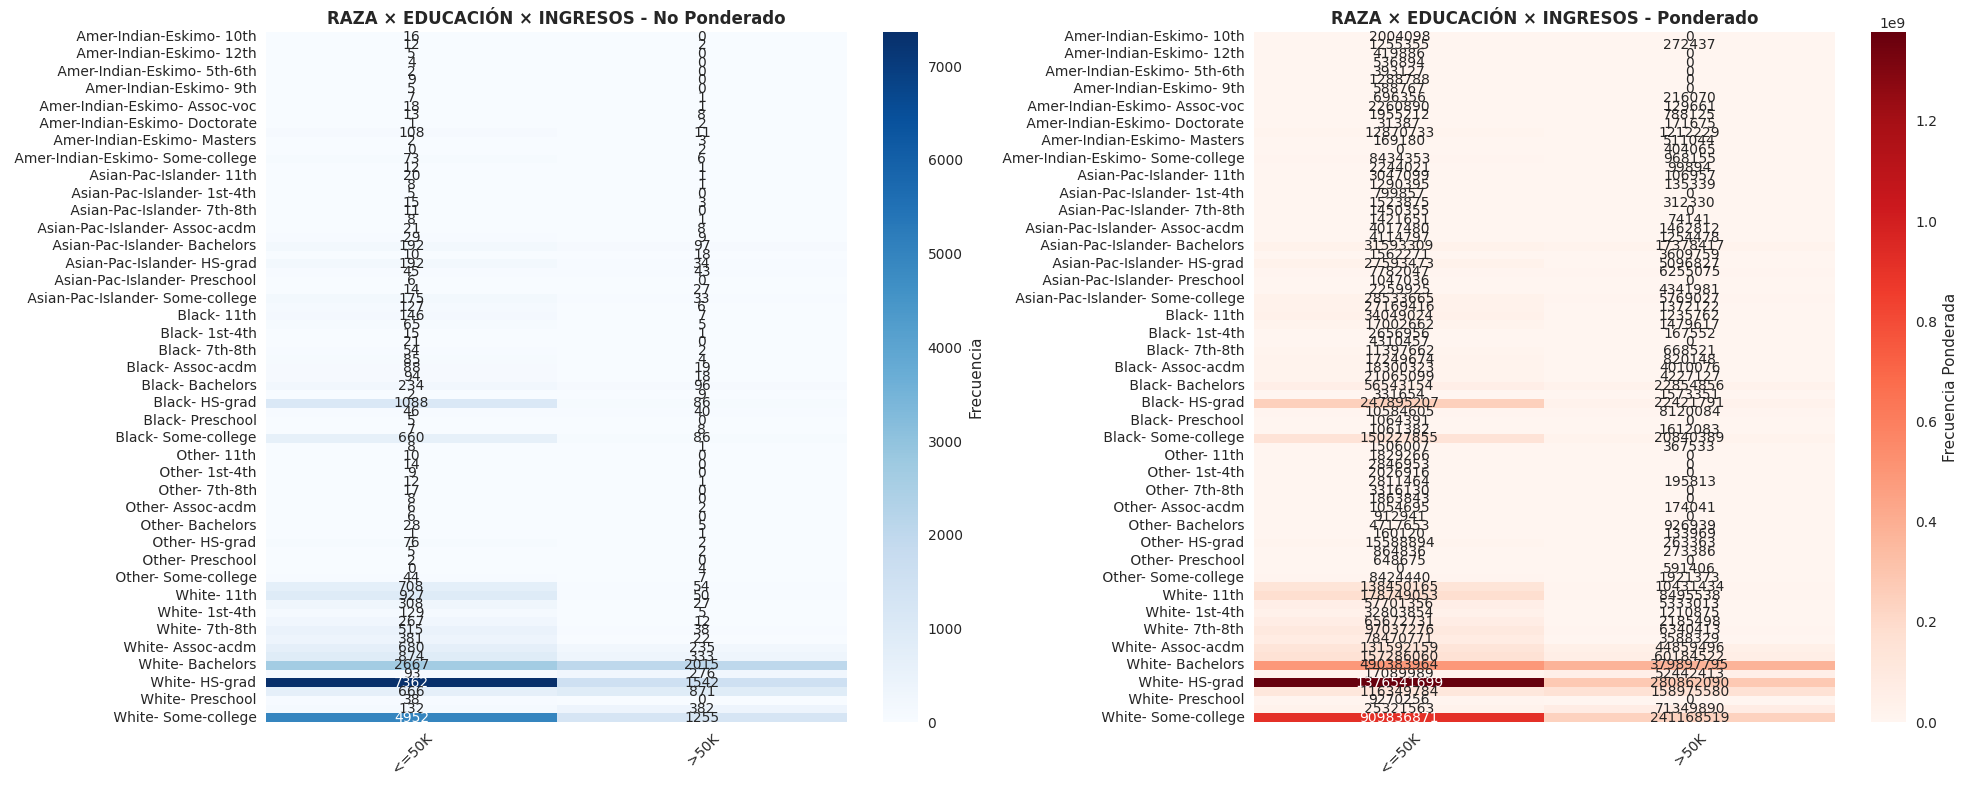



2. ANÁLISIS PARA INGRESOS ALTOS (>50K) - RAZA × EDUCACIÓN
--------------------------------------------------

Tabla NO PONDERADA (>50K):
income                           >50K
race               education         
Amer-Indian-Eskimo 11th             2
                   Assoc-acdm       1
                   Assoc-voc        1
                   Bachelors        8
                   Doctorate        2
                   HS-grad         11
                   Masters          3
                   Prof-school      2
                   Some-college     6
Asian-Pac-Islander 10th             1
                   11th             1
                   12th             1
                   5th-6th          3
                   9th              1
                   Assoc-acdm       8
                   Assoc-voc        9
                   Bachelors       97
                   Doctorate       18
                   HS-grad         34
                   Masters         43
                   Prof-s

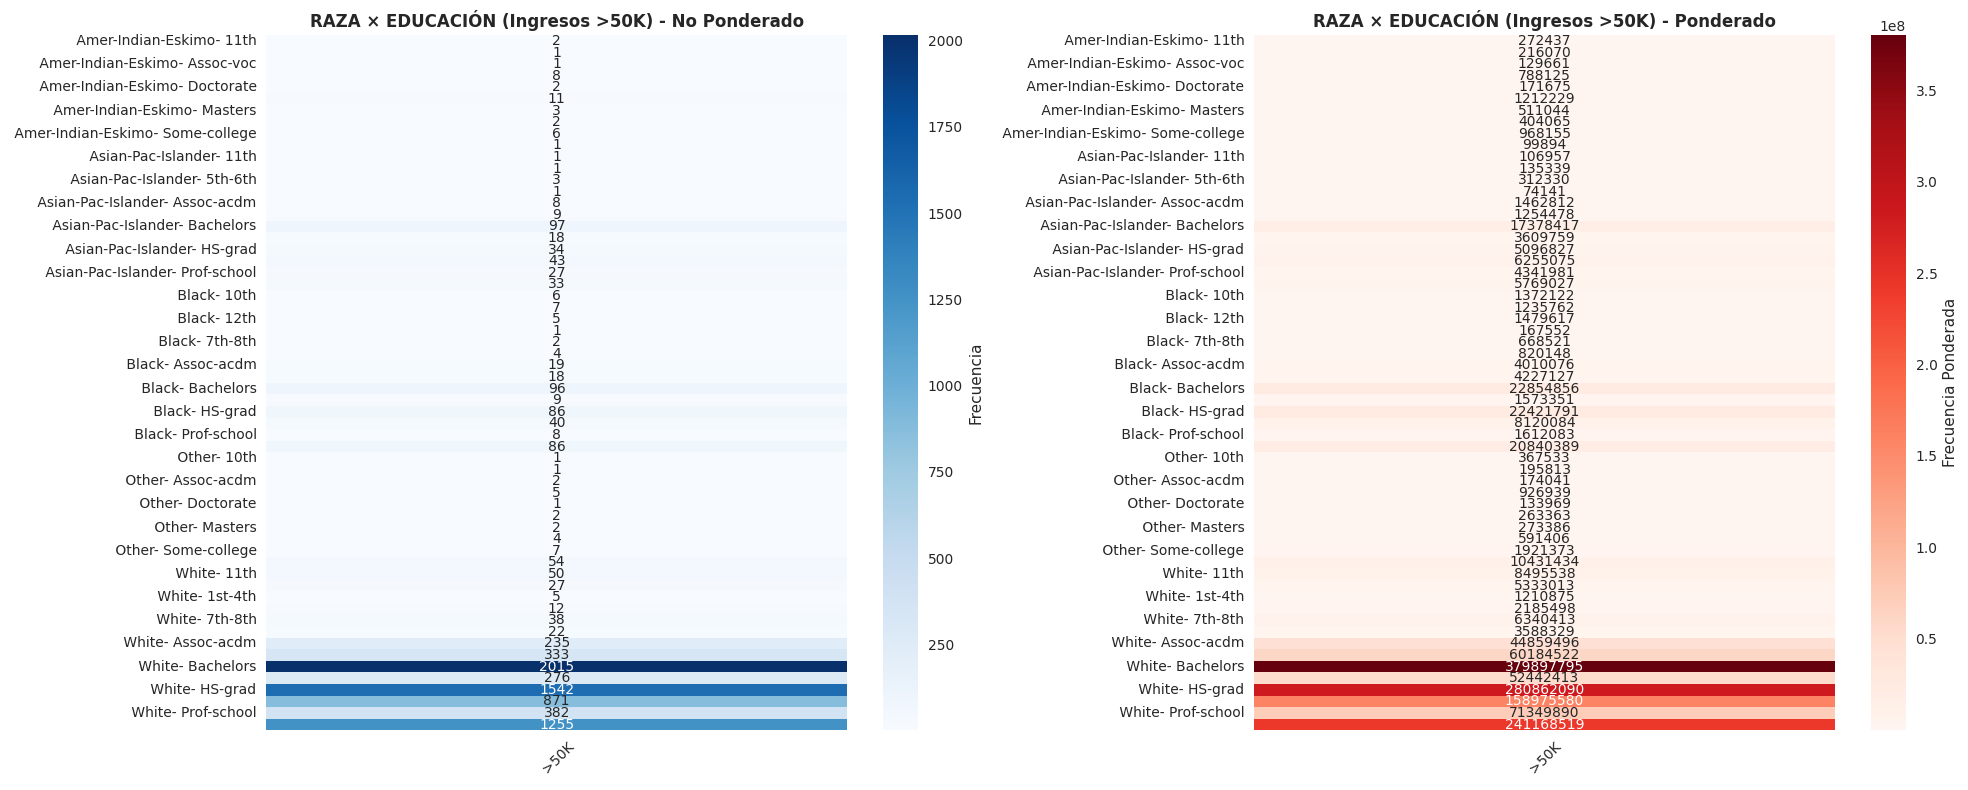



3. ANÁLISIS PARA INGRESOS BAJOS (<=50K) - RAZA × EDUCACIÓN
--------------------------------------------------

Tabla NO PONDERADA (<=50K):
income                           <=50K
race               education          
Amer-Indian-Eskimo 10th             16
                   11th             12
                   12th              5
                   1st-4th           4
                   5th-6th           2
...                                ...
White              HS-grad        7362
                   Masters         666
                   Preschool        38
                   Prof-school     132
                   Some-college   4952

[77 rows x 1 columns]

Tabla PONDERADA (<=50K):
income                                <=50K
race               education               
Amer-Indian-Eskimo 10th             2004098
                   11th             1255355
                   12th              419886
                   1st-4th           536894
                   5th-6th           39

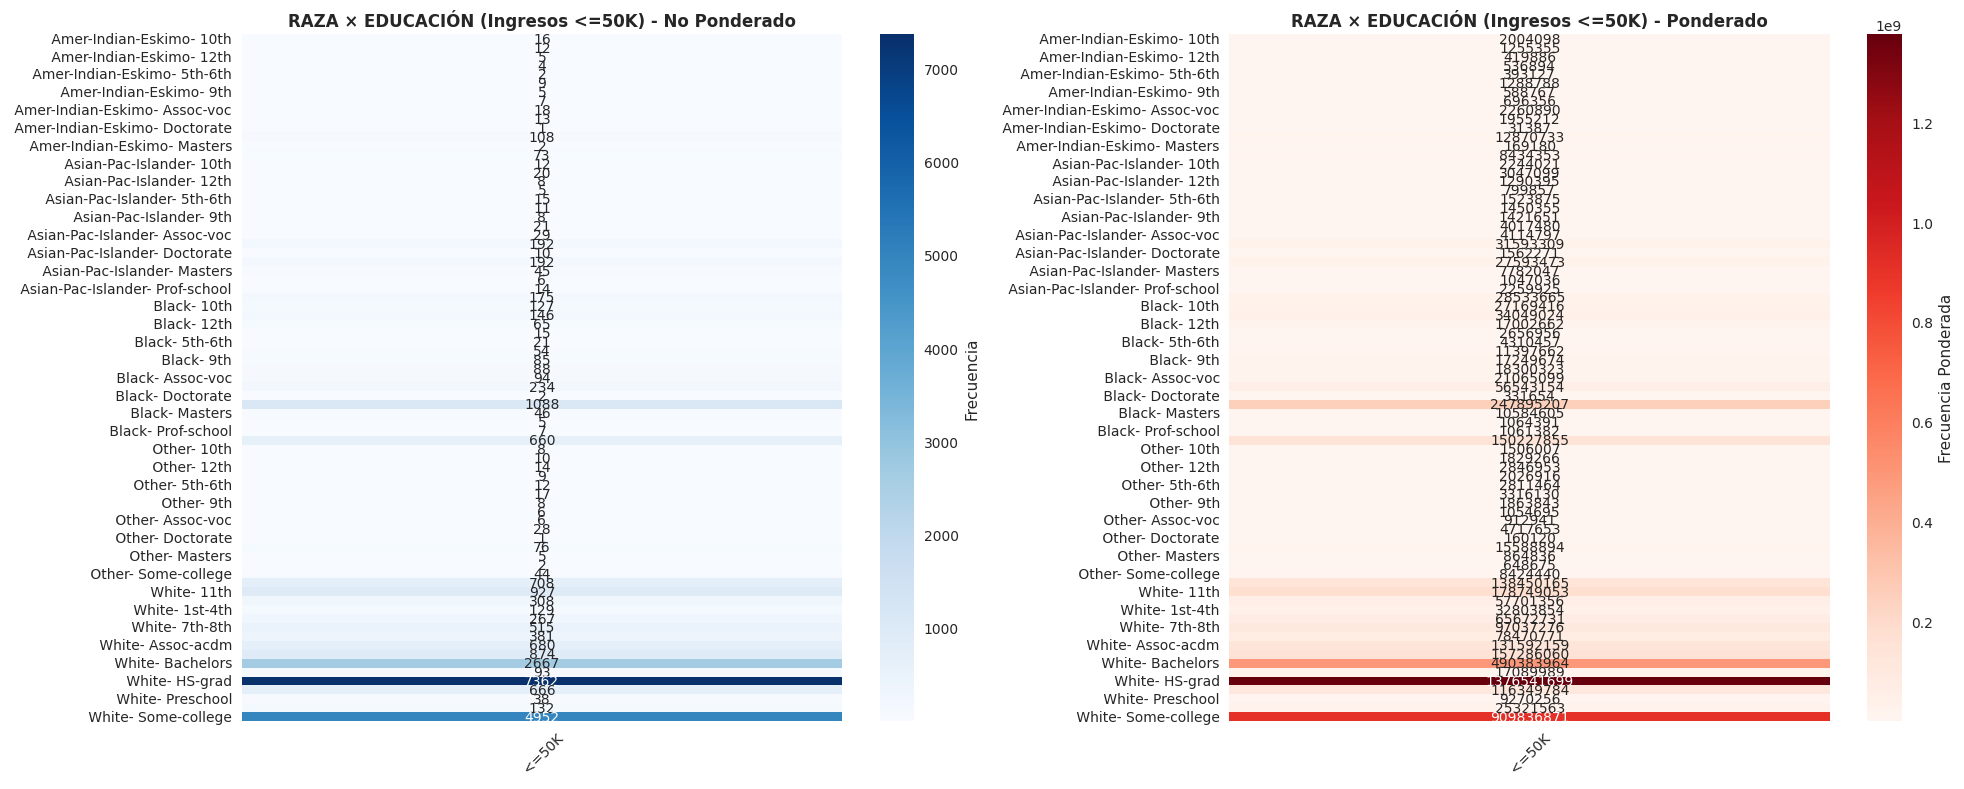

In [80]:
print("ANÁLISIS TRIVARIADO: RAZA × EDUCACIÓN × INGRESOS")
print("="*50)

print("\n1. ANÁLISIS COMPLETO - RAZA × EDUCACIÓN × INGRESOS")
print("-" * 50)

race_education_income_unweighted = create_trivariate_table(df_clean, 'race', 'education', 'income', weighted=False)
print("\nTabla NO PONDERADA:")
print(race_education_income_unweighted)

race_education_income_weighted = create_trivariate_table(df_clean, 'race', 'education', 'income', weighted=True)
print("\nTabla PONDERADA:")
print(race_education_income_weighted)

plot_trivariate_comparison(race_education_income_unweighted, race_education_income_weighted, 
                          "RAZA × EDUCACIÓN × INGRESOS")

print("\n\n2. ANÁLISIS PARA INGRESOS ALTOS (>50K) - RAZA × EDUCACIÓN")
print("-" * 50)

race_education_high_unweighted = create_trivariate_table(df_clean, 'race', 'education', 'income', 
                                                        weighted=False, income_filter=' >50K')
print("\nTabla NO PONDERADA (>50K):")
print(race_education_high_unweighted)

race_education_high_weighted = create_trivariate_table(df_clean, 'race', 'education', 'income', 
                                                      weighted=True, income_filter=' >50K')
print("\nTabla PONDERADA (>50K):")
print(race_education_high_weighted)

plot_trivariate_comparison(race_education_high_unweighted, race_education_high_weighted, 
                          "RAZA × EDUCACIÓN (Ingresos >50K)")

print("\n\n3. ANÁLISIS PARA INGRESOS BAJOS (<=50K) - RAZA × EDUCACIÓN")
print("-" * 50)

race_education_low_unweighted = create_trivariate_table(df_clean, 'race', 'education', 'income', 
                                                       weighted=False, income_filter=' <=50K')
print("\nTabla NO PONDERADA (<=50K):")
print(race_education_low_unweighted)

race_education_low_weighted = create_trivariate_table(df_clean, 'race', 'education', 'income', 
                                                     weighted=True, income_filter=' <=50K')
print("\nTabla PONDERADA (<=50K):")
print(race_education_low_weighted)

plot_trivariate_comparison(race_education_low_unweighted, race_education_low_weighted, 
                          "RAZA × EDUCACIÓN (Ingresos <=50K)")

TABLA DE CONTINGENCIA TRIVARIADA: SEXO × RAZA × INGRESOS

Tabla de contingencia TRIVARIADA PONDERADA (usando fnlwgt):
sex     race                income
Female  Amer-Indian-Eskimo  <=50K       11664993
                            >50K         1776144
        Asian-Pac-Islander  <=50K       44894096
                            >50K         6124322
        Black               <=50K      312647965
                            >50K        18522543
        Other               <=50K       17843301
                            >50K          961340
        White               <=50K     1397055711
                            >50K       189183103
Male    Amer-Indian-Eskimo  <=50K       21240033
                            >50K         2897317
        Asian-Pac-Islander  <=50K       75387160
                            >50K        39772715
        Black               <=50K      308261556
                            >50K        72880936
        Other               <=50K       30729532
              

<Figure size 1000x600 with 0 Axes>

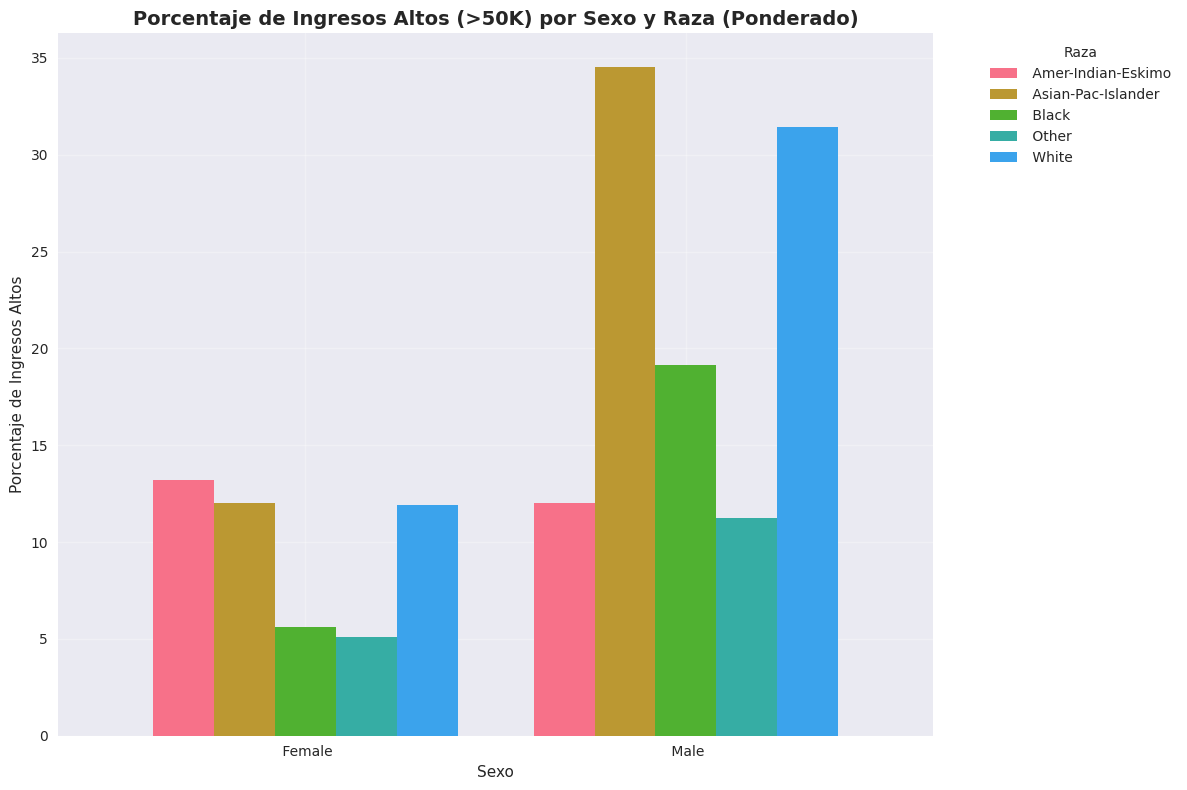

In [81]:
print("TABLA DE CONTINGENCIA TRIVARIADA: SEXO × RAZA × INGRESOS")
print("="*60)

sex_race_income_weighted = create_contingency_table_3way(df_clean, 'sex', 'race', 'income', weighted=True)
print("\nTabla de contingencia TRIVARIADA PONDERADA (usando fnlwgt):")
print(sex_race_income_weighted)

print("\nAnálisis de ingresos altos (>50K) por combinación sexo-raza:")
print("-" * 60)

income_high_analysis = df_clean[df_clean['income'] == ' >50K'].groupby(['sex', 'race'])['fnlwgt'].sum()
total_by_sex_race = df_clean.groupby(['sex', 'race'])['fnlwgt'].sum()
income_high_pct = (income_high_analysis / total_by_sex_race * 100).round(2)

print("Porcentaje de ingresos altos por combinación sexo-raza:")
print(income_high_pct.unstack().fillna(0))

plt.figure(figsize=(10, 6))
income_high_pct.unstack().plot(kind='bar', width=0.8)
plt.title('Porcentaje de Ingresos Altos (>50K) por Sexo y Raza (Ponderado)', fontsize=14, fontweight='bold')
plt.xlabel('Sexo')
plt.ylabel('Porcentaje de Ingresos Altos')
plt.legend(title='Raza', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

ANÁLISIS DE CONCENTRACIÓN Y SEGREGACIÓN OCUPACIONAL

3. Patrones de Concentración Demográfica

CONCENTRACIÓN OCUPACIONAL POR GÉNERO
Índices de concentración ocupacional por género:
 Female: 0.1590
 Male: 0.1117

Top 5 ocupaciones más concentradas por género:

 Female:
   Adm-clerical: 0.239 (23.9%)
   Prof-specialty: 0.213 (21.3%)
   Other-service: 0.162 (16.2%)
   Sales: 0.119 (11.9%)
   Exec-managerial: 0.107 (10.7%)

 Male:
   Craft-repair: 0.178 (17.8%)
   Prof-specialty: 0.165 (16.5%)
   Exec-managerial: 0.128 (12.8%)
   Sales: 0.110 (11.0%)
   Other-service: 0.071 (7.1%)


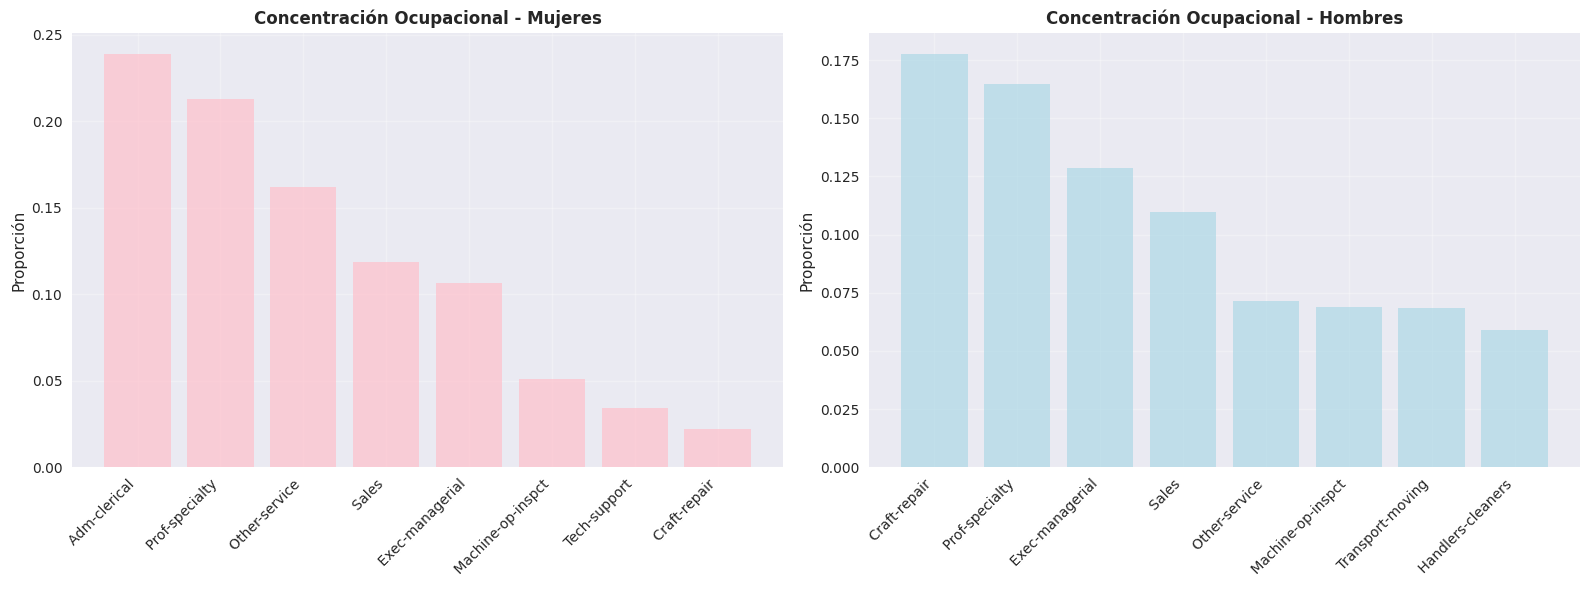

In [82]:
print("CONCENTRACIÓN OCUPACIONAL POR GÉNERO")
print("="*40)

def calculate_concentration_index(proportions):
    return (proportions ** 2).sum()

sex_occupation_dist = df_clean.groupby(['sex', 'occupation'])['fnlwgt'].sum()
sex_totals = df_clean.groupby('sex')['fnlwgt'].sum()
sex_occupation_proportions = (sex_occupation_dist / sex_totals).reset_index()
sex_occupation_proportions.columns = ['sex', 'occupation', 'proportion']

concentration_by_sex = {}
for sex in sex_occupation_proportions['sex'].unique():
    sex_data = sex_occupation_proportions[sex_occupation_proportions['sex'] == sex]
    concentration = calculate_concentration_index(sex_data['proportion'])
    concentration_by_sex[sex] = concentration

print("Índices de concentración ocupacional por género:")
for sex, concentration in concentration_by_sex.items():
    print(f"{sex}: {concentration:.4f}")

print("\nTop 5 ocupaciones más concentradas por género:")
for sex in [' Female', ' Male']:
    if sex in sex_occupation_proportions['sex'].values:
        sex_data = sex_occupation_proportions[sex_occupation_proportions['sex'] == sex]
        top_occupations = sex_data.nlargest(5, 'proportion')
        print(f"\n{sex}:")
        for _, row in top_occupations.iterrows():
            print(f"  {row['occupation']}: {row['proportion']:.3f} ({row['proportion']*100:.1f}%)")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

female_data = sex_occupation_proportions[sex_occupation_proportions['sex'] == ' Female']
if not female_data.empty:
    female_data = female_data.nlargest(8, 'proportion')
    ax1.bar(range(len(female_data)), female_data['proportion'], color='pink', alpha=0.7)
    ax1.set_title('Concentración Ocupacional - Mujeres', fontweight='bold')
    ax1.set_ylabel('Proporción')
    ax1.set_xticks(range(len(female_data)))
    ax1.set_xticklabels(female_data['occupation'], rotation=45, ha='right')
    ax1.grid(True, alpha=0.3)

male_data = sex_occupation_proportions[sex_occupation_proportions['sex'] == ' Male']
if not male_data.empty:
    male_data = male_data.nlargest(8, 'proportion')
    ax2.bar(range(len(male_data)), male_data['proportion'], color='lightblue', alpha=0.7)
    ax2.set_title('Concentración Ocupacional - Hombres', fontweight='bold')
    ax2.set_ylabel('Proporción')
    ax2.set_xticks(range(len(male_data)))
    ax2.set_xticklabels(male_data['occupation'], rotation=45, ha='right')
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

CONCENTRACIÓN OCUPACIONAL POR RAZA
Índices de concentración ocupacional por raza:
 Amer-Indian-Eskimo : 0.1064
 Asian-Pac-Islander : 0.1332
 Black              : 0.1094
 Other              : 0.1161
 White              : 0.1127

Top 3 ocupaciones más concentradas por raza:

 Amer-Indian-Eskimo:
   Craft-repair: 0.165 (16.5%)
   Prof-specialty: 0.148 (14.8%)
   Other-service: 0.111 (11.1%)

 Asian-Pac-Islander:
   Prof-specialty: 0.243 (24.3%)
   Adm-clerical: 0.139 (13.9%)
   Exec-managerial: 0.131 (13.1%)

 Black:
   Other-service: 0.171 (17.1%)
   Adm-clerical: 0.153 (15.3%)
   Prof-specialty: 0.140 (14.0%)

 Other:
   Prof-specialty: 0.183 (18.3%)
   Machine-op-inspct: 0.151 (15.1%)
   Other-service: 0.143 (14.3%)

 White:
   Prof-specialty: 0.184 (18.4%)
   Craft-repair: 0.135 (13.5%)
   Exec-managerial: 0.128 (12.8%)


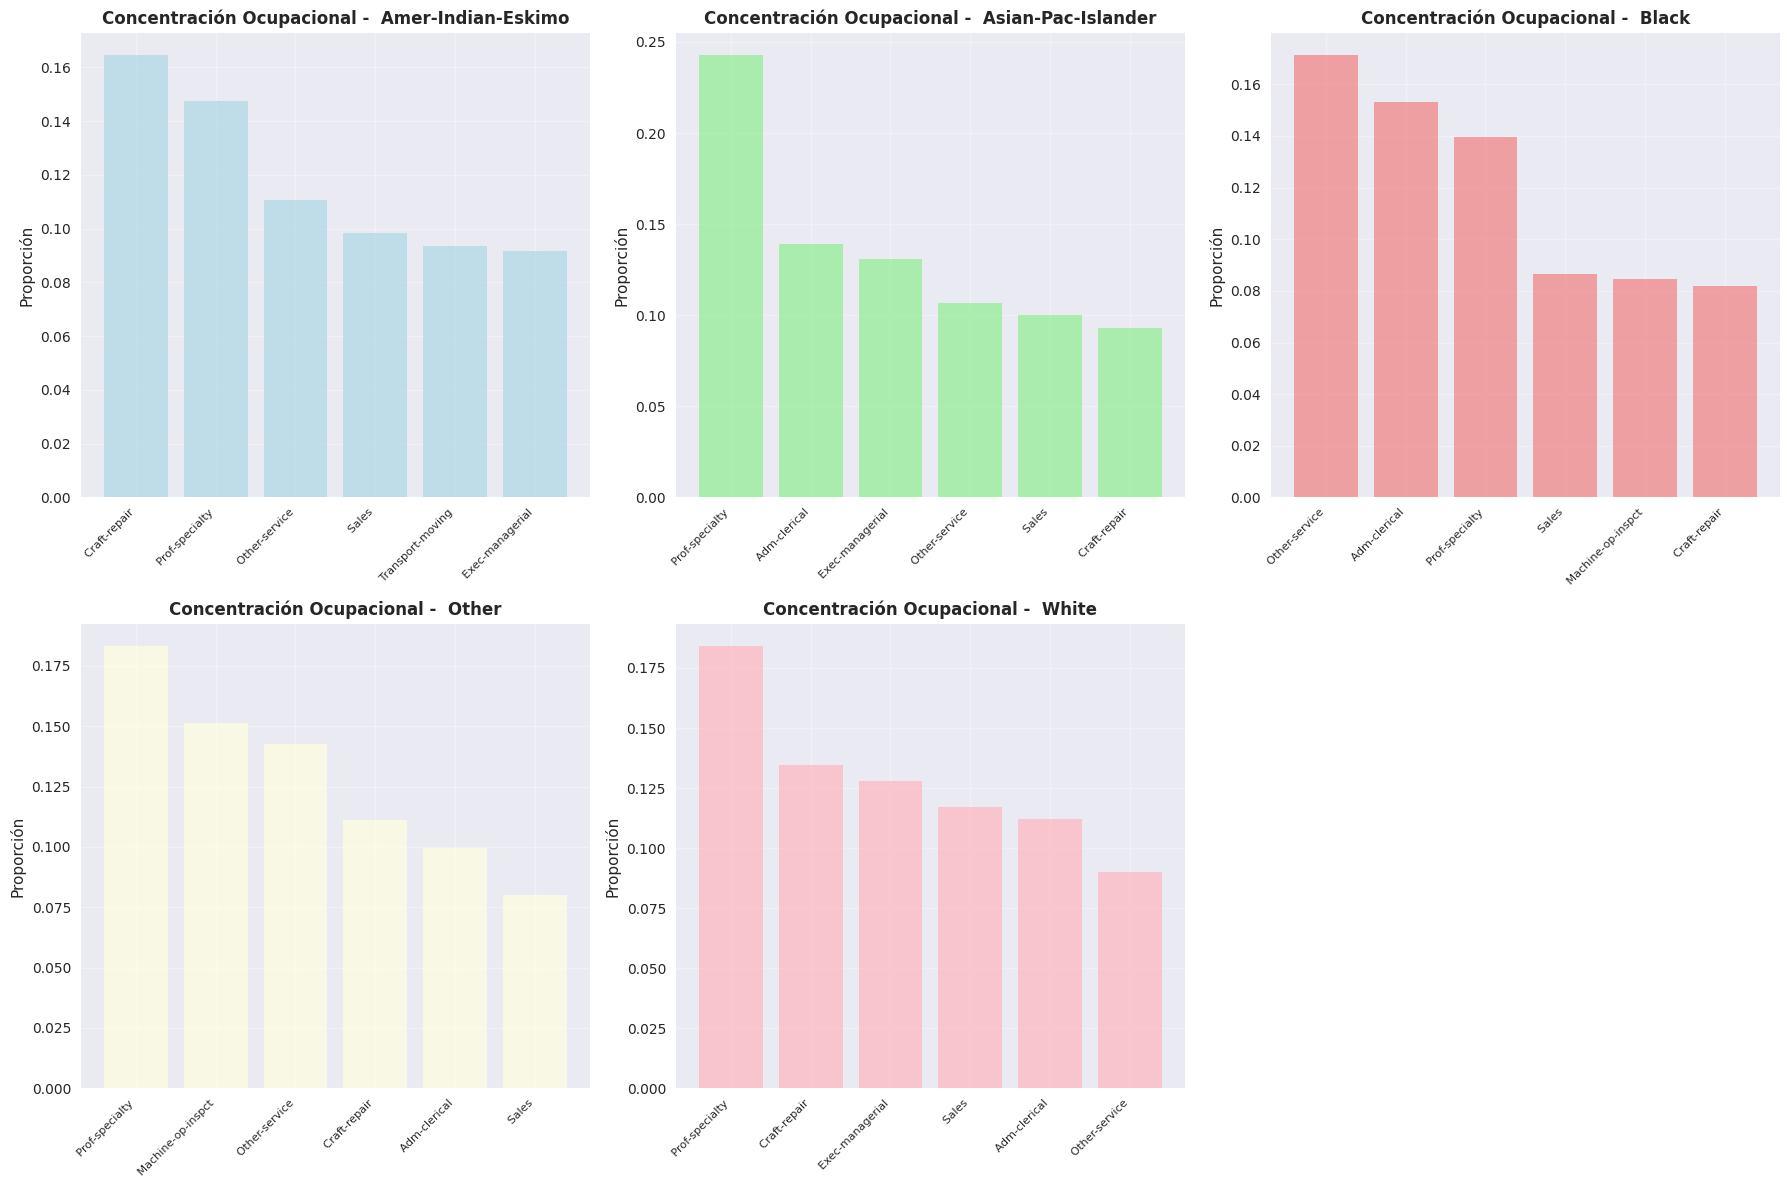

In [83]:
print("CONCENTRACIÓN OCUPACIONAL POR RAZA")
print("="*40)

race_occupation_dist = df_clean.groupby(['race', 'occupation'])['fnlwgt'].sum()
race_totals = df_clean.groupby('race')['fnlwgt'].sum()
race_occupation_proportions = (race_occupation_dist / race_totals).reset_index()
race_occupation_proportions.columns = ['race', 'occupation', 'proportion']

concentration_by_race = {}
for race in race_occupation_proportions['race'].unique():
    race_data = race_occupation_proportions[race_occupation_proportions['race'] == race]
    concentration = calculate_concentration_index(race_data['proportion'])
    concentration_by_race[race] = concentration

print("Índices de concentración ocupacional por raza:")
for race, concentration in concentration_by_race.items():
    print(f"{race:20s}: {concentration:.4f}")

print("\nTop 3 ocupaciones más concentradas por raza:")
for race in race_occupation_proportions['race'].unique():
    race_data = race_occupation_proportions[race_occupation_proportions['race'] == race]
    top_occupations = race_data.nlargest(3, 'proportion')
    print(f"\n{race}:")
    for _, row in top_occupations.iterrows():
        print(f"  {row['occupation']}: {row['proportion']:.3f} ({row['proportion']*100:.1f}%)")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

races = race_occupation_proportions['race'].unique()
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink']

for i, race in enumerate(races):
    if i < len(axes):
        race_data = race_occupation_proportions[race_occupation_proportions['race'] == race]
        race_data = race_data.nlargest(6, 'proportion')
        
        axes[i].bar(range(len(race_data)), race_data['proportion'], 
                   color=colors[i % len(colors)], alpha=0.7)
        axes[i].set_title(f'Concentración Ocupacional - {race}', fontweight='bold')
        axes[i].set_ylabel('Proporción')
        axes[i].set_xticks(range(len(race_data)))
        axes[i].set_xticklabels(race_data['occupation'], rotation=45, ha='right', fontsize=8)
        axes[i].grid(True, alpha=0.3)

if len(races) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()